In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltd
import seaborn as sns

In [2]:
import pandas as pd

# 读取数据
file_path = r'D:\UoM\DATA72002\Data\Next_Generation_Simulation__NGSIM.csv'
df = pd.read_csv(file_path)

# 输出读取数据后的前几行，确认数据读取是否成功
print(df.head())


   Vehicle_ID  Frame_ID  Total_Frames    Global_Time  Local_X   Local_Y  \
0         515      2330          1123  1118848075000   30.034   188.062   
1         515      2330          1123  1118848075000   30.034   188.062   
2        2224      6548          1902  1113437421700   41.429   472.901   
3        2127      6459           567  1118847624800   19.632  1775.614   
4        1033      4827           592  1118848324700    6.202  1701.144   

      Global_X     Global_Y  v_length  v_Width  ...  D_Zone  Int_ID  \
0  6451203.729  1873252.549      13.0      6.9  ...     NaN     NaN   
1  6451203.729  1873252.549      13.0      6.9  ...     NaN     NaN   
2  6042814.264  2133542.012      14.3      6.9  ...     NaN     NaN   
3  6452425.122  1872172.475      13.5      6.9  ...     NaN     NaN   
4  6452347.673  1872258.452      13.5      4.4  ...     NaN     NaN   

   Section_ID  Direction  Movement  Preceding  Following  Space_Headway  \
0         NaN        NaN       NaN        500  

In [3]:
# 筛选 O_Zone 为缺失值的行
missing_o_zone = df[df['O_Zone'].isnull()]

# 查看这些行对应的 Location 列
locations_with_missing_o_zone = missing_o_zone['Location'].unique()

# 输出相关的 Location
print(locations_with_missing_o_zone)


['us-101' 'i-80']


In [4]:
# 读取数据
df = pd.read_csv(file_path)

# 输出数据的缺失值
df.isnull().sum()


Vehicle_ID            0
Frame_ID              0
Total_Frames          0
Global_Time           0
Local_X               0
Local_Y               0
Global_X              0
Global_Y              0
v_length              0
v_Width               0
v_Class               0
v_Vel                 0
v_Acc                 0
Lane_ID               0
O_Zone           776398
D_Zone           776398
Int_ID           776398
Section_ID       776398
Direction        776398
Movement         776398
Preceding             0
Following             0
Space_Headway         0
Time_Headway          0
Location              0
dtype: int64

In [5]:
# 只保留 Location 为 'us-101' 的数据
df_us101 = df[df['Location'] == 'us-101']

# 输出筛选后的数据
print(df_us101.head())


   Vehicle_ID  Frame_ID  Total_Frames    Global_Time  Local_X   Local_Y  \
0         515      2330          1123  1118848075000   30.034   188.062   
1         515      2330          1123  1118848075000   30.034   188.062   
3        2127      6459           567  1118847624800   19.632  1775.614   
4        1033      4827           592  1118848324700    6.202  1701.144   
5        1033      4827           592  1118848324700    6.202  1701.144   

      Global_X     Global_Y  v_length  v_Width  ...  D_Zone  Int_ID  \
0  6451203.729  1873252.549      13.0      6.9  ...     NaN     NaN   
1  6451203.729  1873252.549      13.0      6.9  ...     NaN     NaN   
3  6452425.122  1872172.475      13.5      6.9  ...     NaN     NaN   
4  6452347.673  1872258.452      13.5      4.4  ...     NaN     NaN   
5  6452347.673  1872258.452      13.5      4.4  ...     NaN     NaN   

   Section_ID  Direction  Movement  Preceding  Following  Space_Headway  \
0         NaN        NaN       NaN        500  

In [6]:
# 根据 Vehicle_ID 升序排序
df_us101_sorted = df_us101.sort_values(by='Vehicle_ID', ascending=True)

# 输出排序后的数据
print(df_us101_sorted.head())


        Vehicle_ID  Frame_ID  Total_Frames    Global_Time  Local_X  Local_Y  \
838834           1       297           569  1118847871700   51.582  165.927   
857823           1       248           421  1118848781800   55.493  353.730   
51118            1       417           569  1118847883700   53.644  456.083   
705629           1       347           569  1118847876700   51.994  278.207   
899468           1       276           569  1118847869600   51.213  124.815   

           Global_X     Global_Y  v_length  v_Width  ...  D_Zone  Int_ID  \
838834  6451172.880  1873254.074      47.0      8.5  ...     NaN     NaN   
857823  6451307.663  1873111.583      15.0      6.4  ...     NaN     NaN   
51118   6451380.565  1873045.850      47.0      8.5  ...     NaN     NaN   
705629  6451251.760  1873170.480      47.0      8.5  ...     NaN     NaN   
899468  6451144.650  1873285.171      47.0      8.5  ...     NaN     NaN   

        Section_ID  Direction  Movement  Preceding  Following  Space

In [7]:
import pandas as pd

# 假设df_us101_sorted是已加载的数据
# 将 Global_Time 列从毫秒转换为日期时间
df_us101_sorted['Global_Time'] = pd.to_datetime(df_us101_sorted['Global_Time'], unit='ms')

# 将时间减去7小时（调整到美国时间）
df_us101_sorted['Global_Time'] = df_us101_sorted['Global_Time'] - pd.Timedelta(hours=7)

# 输出转换后的数据
print("\nStep 4: Converted Global_Time to DateTime and Adjusted for UTC-7")
print(df_us101_sorted.head())



Step 4: Converted Global_Time to DateTime and Adjusted for UTC-7
        Vehicle_ID  Frame_ID  Total_Frames             Global_Time  Local_X  \
838834           1       297           569 2005-06-15 08:04:31.700   51.582   
857823           1       248           421 2005-06-15 08:19:41.800   55.493   
51118            1       417           569 2005-06-15 08:04:43.700   53.644   
705629           1       347           569 2005-06-15 08:04:36.700   51.994   
899468           1       276           569 2005-06-15 08:04:29.600   51.213   

        Local_Y     Global_X     Global_Y  v_length  v_Width  ...  D_Zone  \
838834  165.927  6451172.880  1873254.074      47.0      8.5  ...     NaN   
857823  353.730  6451307.663  1873111.583      15.0      6.4  ...     NaN   
51118   456.083  6451380.565  1873045.850      47.0      8.5  ...     NaN   
705629  278.207  6451251.760  1873170.480      47.0      8.5  ...     NaN   
899468  124.815  6451144.650  1873285.171      47.0      8.5  ...     NaN 

In [8]:
# 对每个 Vehicle_ID 的 Global_Time 按照升序排序
df_us101_sorted = df_us101_sorted.sort_values(by=['Vehicle_ID', 'Global_Time'], ascending=[True, True])

# 输出按照 Vehicle_ID 和 Global_Time 升序排序后的数据
print("\nStep 6: Sorted Data by Vehicle_ID and Global_Time")
print(df_us101_sorted.head())


Step 6: Sorted Data by Vehicle_ID and Global_Time
        Vehicle_ID  Frame_ID  Total_Frames             Global_Time  Local_X  \
768484           1       270           569 2005-06-15 08:04:29.000   51.164   
691407           1       272           569 2005-06-15 08:04:29.200   51.143   
899468           1       276           569 2005-06-15 08:04:29.600   51.213   
315463           1       285           569 2005-06-15 08:04:30.500   51.290   
838834           1       297           569 2005-06-15 08:04:31.700   51.582   

        Local_Y     Global_X     Global_Y  v_length  v_Width  ...  D_Zone  \
768484  112.878  6451136.708  1873294.084      47.0      8.5  ...     NaN   
691407  116.878  6451139.397  1873291.122      47.0      8.5  ...     NaN   
899468  124.815  6451144.650  1873285.171      47.0      8.5  ...     NaN   
315463  141.929  6451156.749  1873271.844      47.0      8.5  ...     NaN   
838834  165.927  6451172.880  1873254.074      47.0      8.5  ...     NaN   

        Int

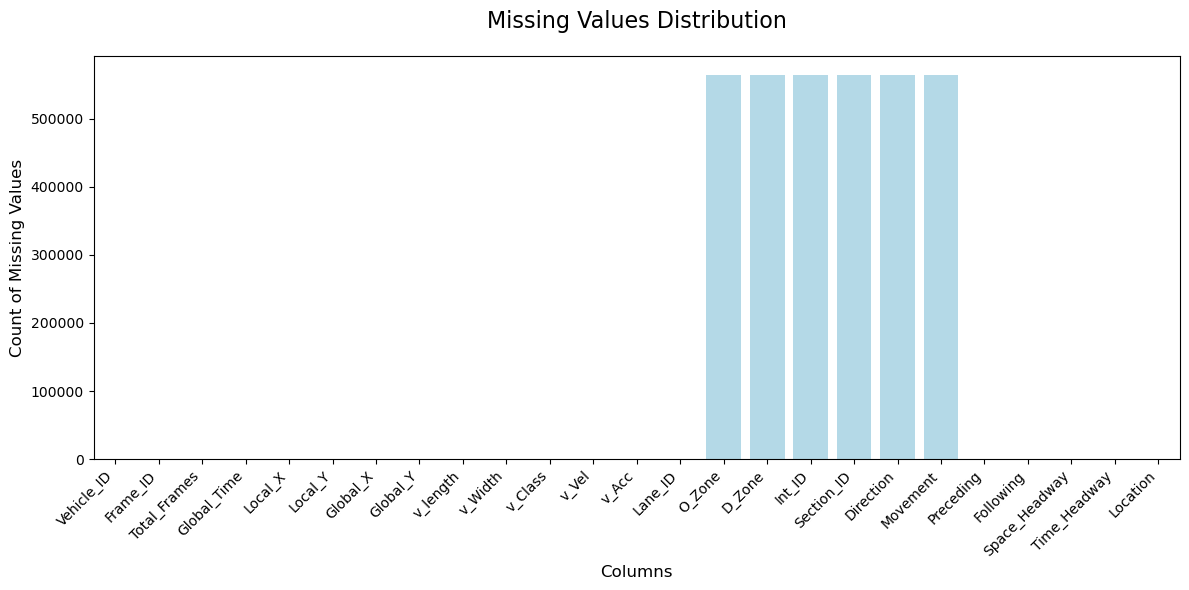

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 计算各列的缺失值数量
missing_values = df_us101_sorted.isnull().sum()

# 2. 创建图形
plt.figure(figsize=(12, 6))

# 3. 绘制条形图（不显示数值标签）
sns.barplot(x=missing_values.index, 
            y=missing_values.values,
            color='skyblue',
            alpha=0.7)

# 4. 美化图表
plt.title('Missing Values Distribution', fontsize=16, pad=20)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Count of Missing Values', fontsize=12)
plt.xticks(rotation=45, ha='right')  # 旋转x轴标签

# 5. 调整布局并保存
plt.tight_layout()
plt.savefig(r'D:\UoM\DATA72002\Data\missing_values_plot.png', dpi=300)
plt.show()

In [10]:
# 查看是否有缺失值
print("\nStep 8: Missing Values Check")
print(df_us101_sorted.isnull().sum())

# 删除指定的列
df_us101_sorted = df_us101_sorted.drop(['O_Zone', 'D_Zone', 'Int_ID', 'Section_ID', 'Direction', 'Movement'], axis=1)

# 输出删除后的数据集的列名，确认删除成功
print("\nStep 9: Columns After Deletion")
print(df_us101_sorted.columns)

# 将处理后的数据保存到新的CSV文件
df_us101_sorted.to_csv(r'D:\UoM\DATA72002\Data\Cleaned1_NGSIM.csv', index=False)

print("\nStep 10: Data saved to Cleaned1_NGSIM.csv")



Step 8: Missing Values Check
Vehicle_ID            0
Frame_ID              0
Total_Frames          0
Global_Time           0
Local_X               0
Local_Y               0
Global_X              0
Global_Y              0
v_length              0
v_Width               0
v_Class               0
v_Vel                 0
v_Acc                 0
Lane_ID               0
O_Zone           564397
D_Zone           564397
Int_ID           564397
Section_ID       564397
Direction        564397
Movement         564397
Preceding             0
Following             0
Space_Headway         0
Time_Headway          0
Location              0
dtype: int64

Step 9: Columns After Deletion
Index(['Vehicle_ID', 'Frame_ID', 'Total_Frames', 'Global_Time', 'Local_X',
       'Local_Y', 'Global_X', 'Global_Y', 'v_length', 'v_Width', 'v_Class',
       'v_Vel', 'v_Acc', 'Lane_ID', 'Preceding', 'Following', 'Space_Headway',
       'Time_Headway', 'Location'],
      dtype='object')

Step 10: Data saved to Cleaned1_NGSI

直方图已保存到: D:\UoM\DATA72002\Data\histograms.png


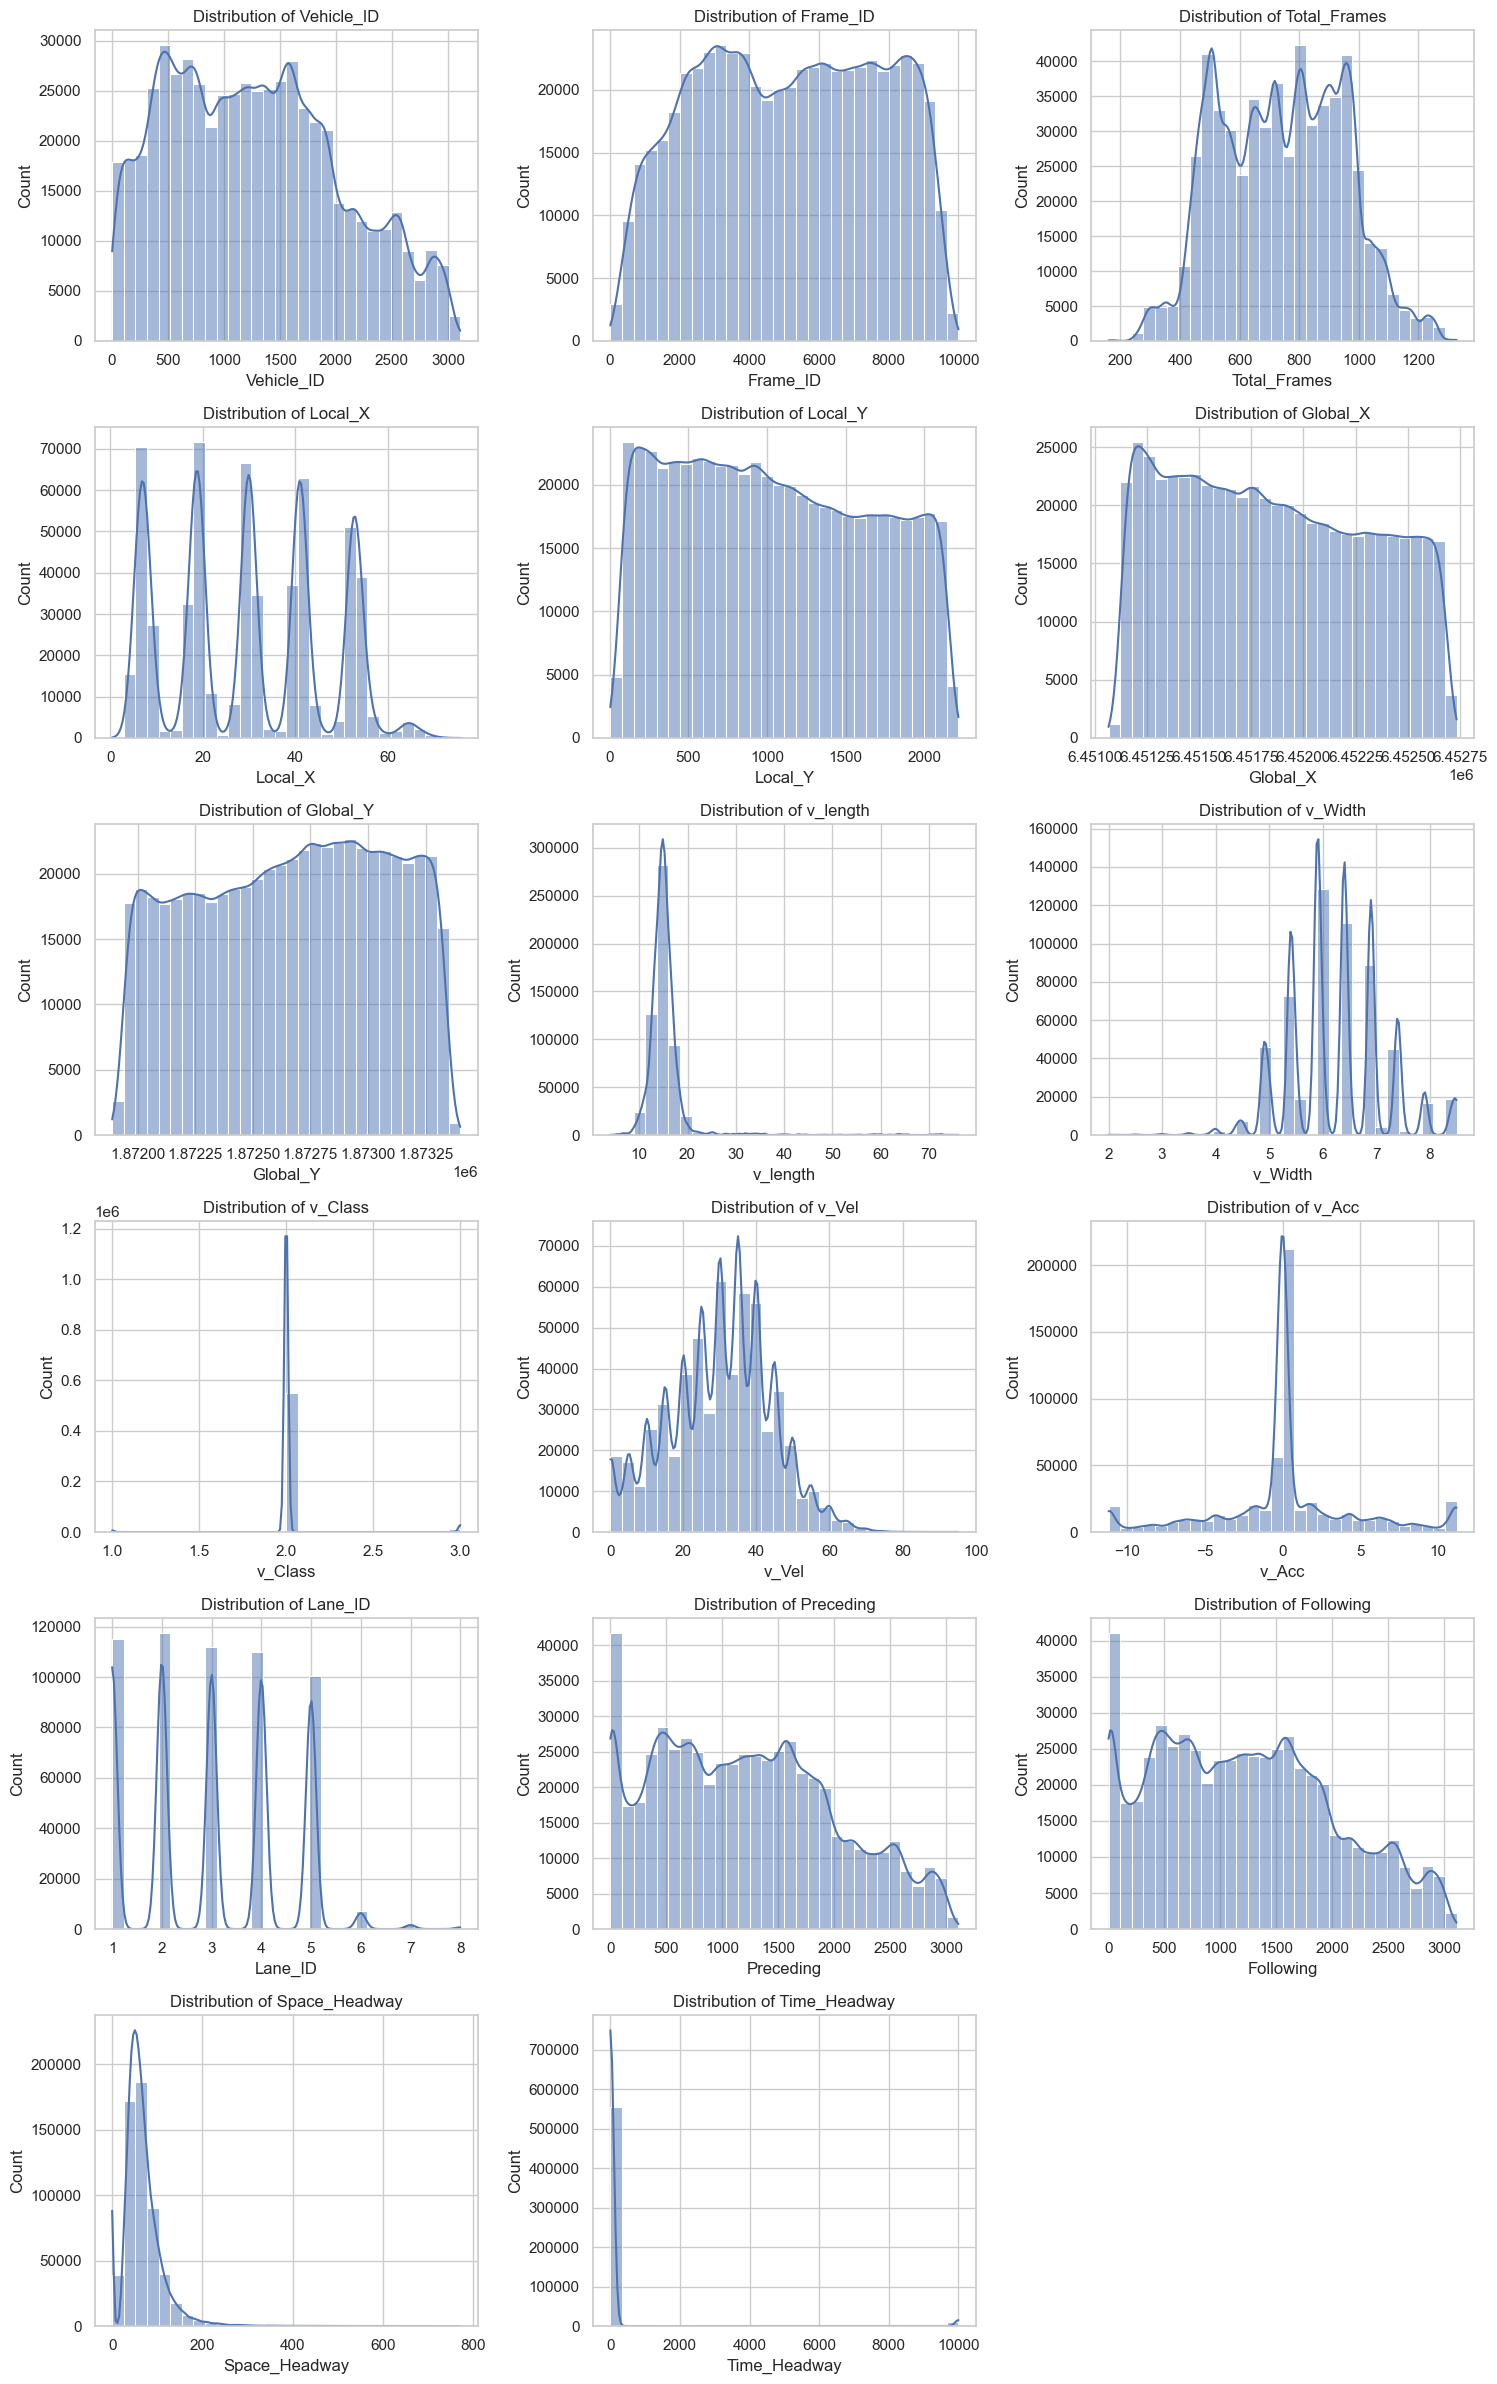

In [11]:
# 方法1：根据数值列数量动态创建直方图子图网格
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 画图风格
sns.set(style="whitegrid")

# 选择数值型列
numeric_cols = df_us101_sorted.select_dtypes(include=[np.number]).columns.tolist()

# 如果没有数值列，给出提示并跳过
if len(numeric_cols) == 0:
    print("没有可用的数值列可绘制直方图。")
else:
    # 动态计算行列数：固定每行3列，行数按数量向上取整
    n_cols = 3
    n_rows = math.ceil(len(numeric_cols) / n_cols)

    # 根据子图数量动态设置画布大小
    # 宽度*列数，高度*行数，可按需微调
    plt.figure(figsize=(5 * n_cols, 4 * n_rows))

    # 循环绘制每个数值列的直方图
    for i, col in enumerate(numeric_cols, start=1):
        ax = plt.subplot(n_rows, n_cols, i)
        # 丢弃该列的NaN，避免影响直方图统计
        data_col = df_us101_sorted[col].dropna()

        # 绘制直方图+核密度估计
        sns.histplot(data=data_col, kde=True, bins=30, ax=ax)
        ax.set_title(f"Distribution of {col}")
        ax.set_xlabel(col)
        ax.set_ylabel("Count")

    # 子图布局紧凑
    plt.tight_layout()

    # 保存与显示
    out_path = r"D:\UoM\DATA72002\Data\histograms.png"
    plt.savefig(out_path, dpi=150)
    print(f"直方图已保存到: {out_path}")
    plt.show()


In [12]:
import pandas as pd

# 加载数据集
Data = r'D:\UoM\DATA72002\Data\Cleaned1_NGSIM.csv'
df = pd.read_csv(Data)

# 查看数据集的行数
print(f"The dataset contains {df.shape[0]} rows.")


The dataset contains 564397 rows.


In [13]:
# 3.4.1 平滑速度和加速度数据
# 使用指数移动平均滤波器对速度和加速度进行平滑处理
# 速度的平滑，span=30
df_us101_sorted['Smoothed_v_Vel'] = df_us101_sorted['v_Vel'].ewm(span=30).mean()

# 加速度的平滑，span=120
df_us101_sorted['Smoothed_v_Acc'] = df_us101_sorted['v_Acc'].ewm(span=120).mean()

# 输出平滑后的数据查看效果
print("\nStep 9: Smoothed Data")
print(df_us101_sorted[['Vehicle_ID', 'Global_Time', 'v_Vel', 'Smoothed_v_Vel', 'v_Acc', 'Smoothed_v_Acc']].head())

# 计算缺失值的数量
print("\nStep 10: Missing Values Check After Smoothing")
print(df_us101_sorted.isnull().sum())

# 加载清理后的数据
Data = r'D:\UoM\DATA72002\Data\Cleaned_NGSIM.csv'
df_cleaned = pd.read_csv(Data)

# 查看数据集的行数
print(f"The dataset contains {df_cleaned.shape[0]} rows.")


Step 9: Smoothed Data
        Vehicle_ID             Global_Time  v_Vel  Smoothed_v_Vel  v_Acc  \
768484           1 2005-06-15 08:04:29.000  19.89       19.890000    0.0   
691407           1 2005-06-15 08:04:29.200  19.89       19.890000    0.0   
899468           1 2005-06-15 08:04:29.600  20.00       19.929137    0.0   
315463           1 2005-06-15 08:04:30.500  20.00       19.948663    0.0   
838834           1 2005-06-15 08:04:31.700  20.00       19.960343    0.0   

        Smoothed_v_Acc  
768484             0.0  
691407             0.0  
899468             0.0  
315463             0.0  
838834             0.0  

Step 10: Missing Values Check After Smoothing
Vehicle_ID        0
Frame_ID          0
Total_Frames      0
Global_Time       0
Local_X           0
Local_Y           0
Global_X          0
Global_Y          0
v_length          0
v_Width           0
v_Class           0
v_Vel             0
v_Acc             0
Lane_ID           0
Preceding         0
Following         0
Spa

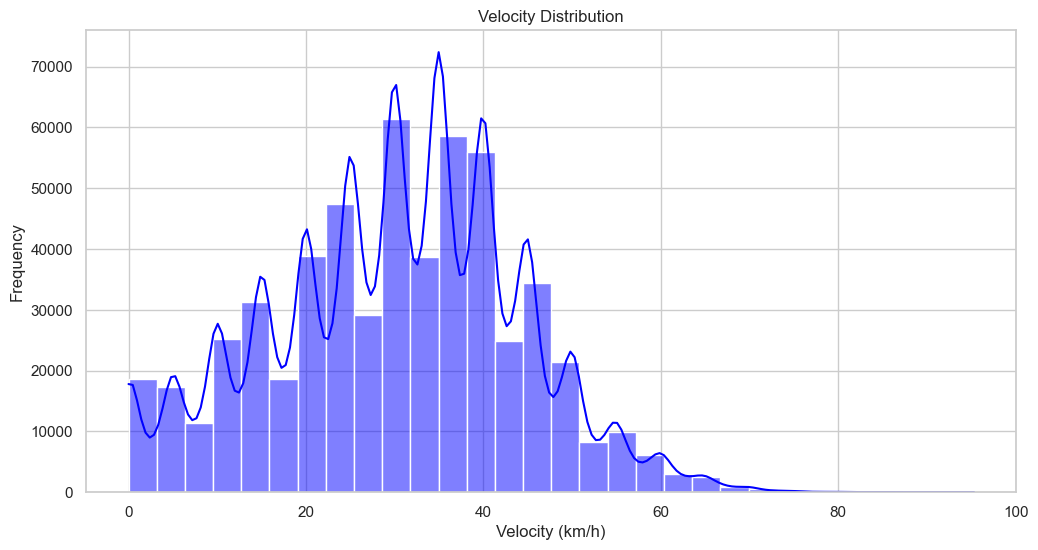

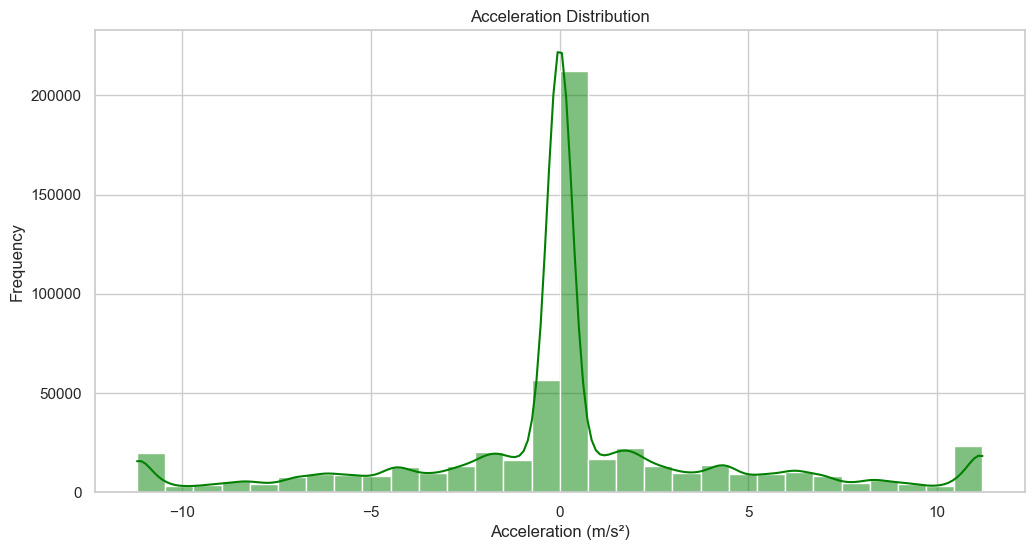

In [14]:
# 绘制速度分布图
plt.figure(figsize=(12, 6))
sns.histplot(df_us101_sorted['v_Vel'], kde=True, color='blue', bins=30)
plt.title('Velocity Distribution')
plt.xlabel('Velocity (km/h)')
plt.ylabel('Frequency')
plt.show()

# 绘制加速度分布图
plt.figure(figsize=(12, 6))
sns.histplot(df_us101_sorted['v_Acc'], kde=True, color='green', bins=30)
plt.title('Acceleration Distribution')
plt.xlabel('Acceleration (m/s²)')
plt.ylabel('Frequency')
plt.show()


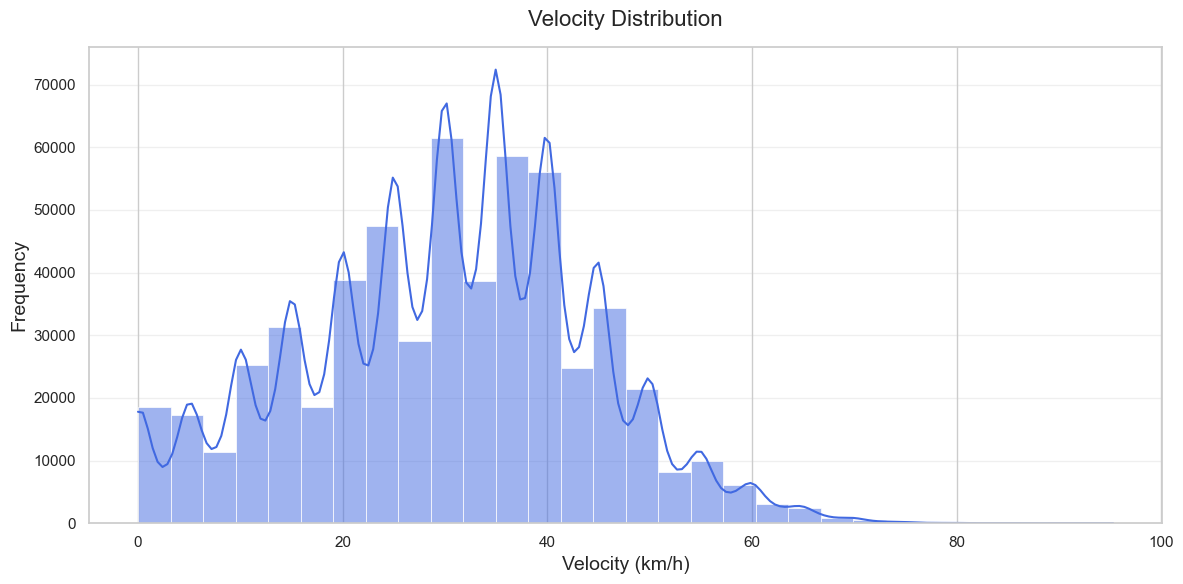

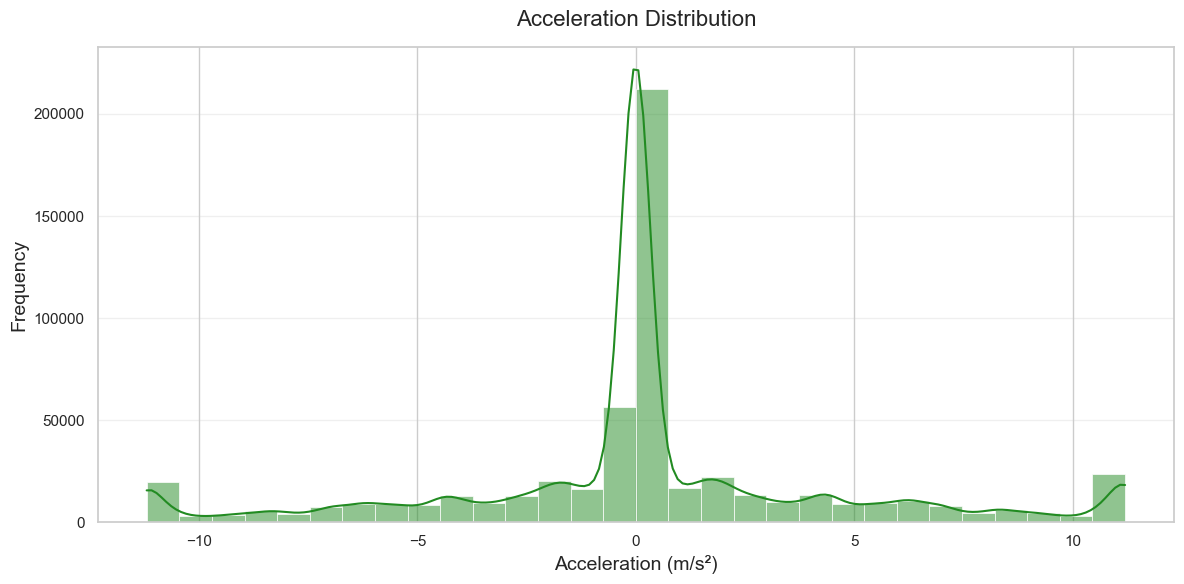

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置全局样式
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12

# 速度分布图
plt.figure(figsize=(12, 6))
sns.histplot(df_us101_sorted['v_Vel'], 
             kde=True, 
             color='royalblue', 
             bins=30,
             edgecolor='white',
             linewidth=0.5)
plt.title('Velocity Distribution', fontsize=16, pad=15)
plt.xlabel('Velocity (km/h)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(r'D:\UoM\DATA72002\Data\velocity_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 加速度分布图
plt.figure(figsize=(12, 6))
sns.histplot(df_us101_sorted['v_Acc'], 
             kde=True, 
             color='forestgreen', 
             bins=30,
             edgecolor='white',
             linewidth=0.5)
plt.title('Acceleration Distribution', fontsize=16, pad=15)
plt.xlabel('Acceleration (m/s²)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(r'D:\UoM\DATA72002\Data\acceleration_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

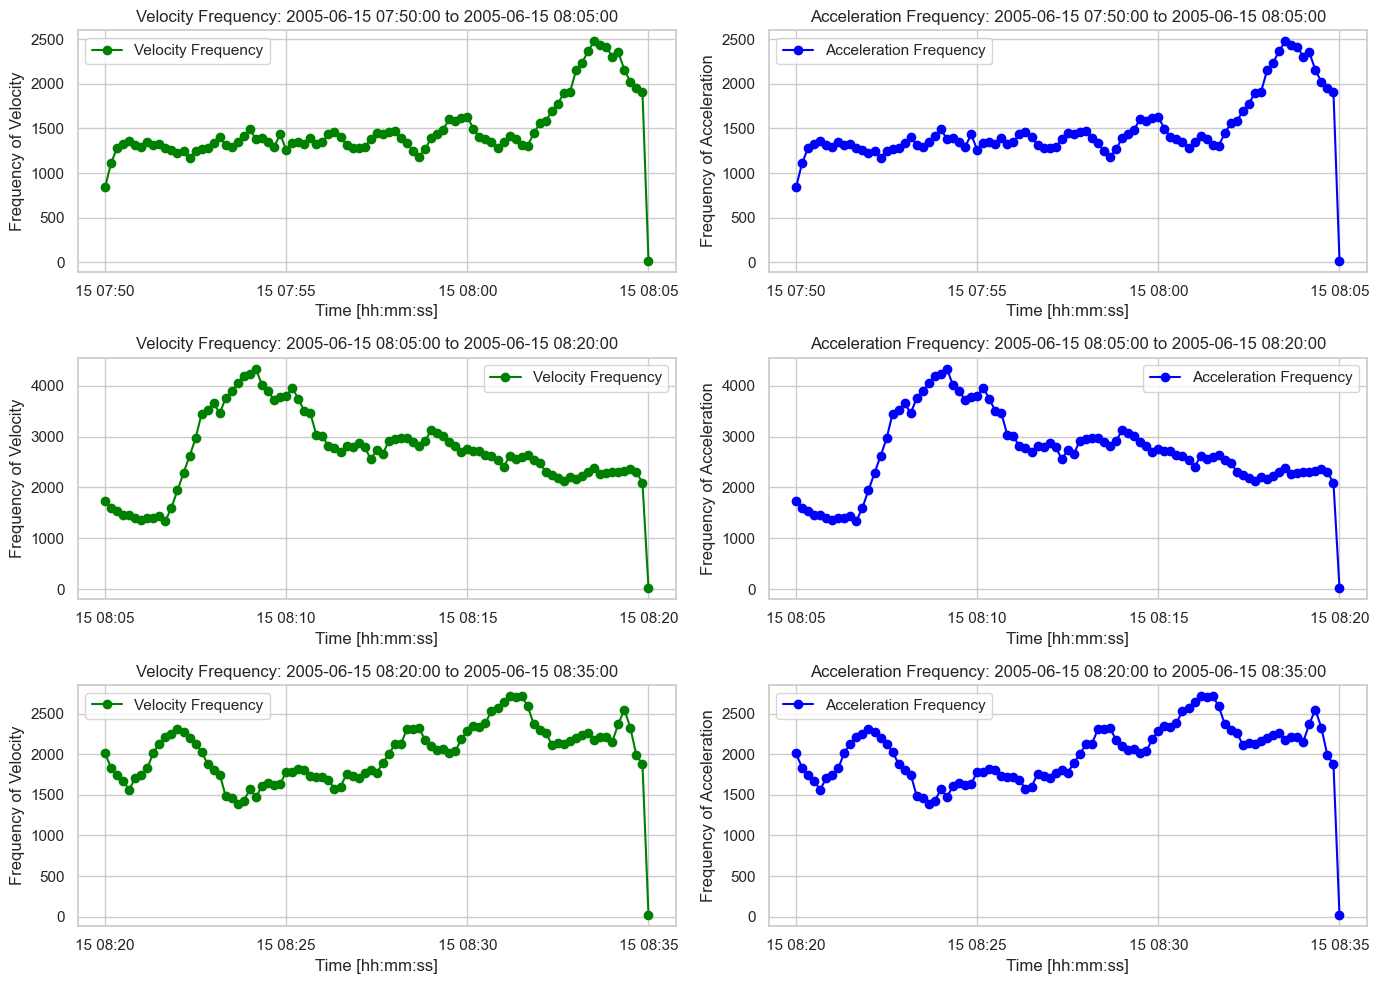

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设df_us101_sorted已经是数据的预处理版本，包括速度和加速度列
# 将时间列转换为datetime格式
df_us101_sorted['Global_Time'] = pd.to_datetime(df_us101_sorted['Global_Time'], unit='ms')

# 定义三个时间段的开始和结束时间
time_periods = [
    ('2005-06-15 07:50:00', '2005-06-15 08:05:00'),  # 7:50 - 8:05
    ('2005-06-15 08:05:00', '2005-06-15 08:20:00'),  # 8:05 - 8:20
    ('2005-06-15 08:20:00', '2005-06-15 08:35:00')   # 8:20 - 8:35
]

# 创建子图
fig, ax = plt.subplots(3, 2, figsize=(14, 10))

# 遍历每个时间段进行处理
for i, (start_time, end_time) in enumerate(time_periods):
    # 筛选出该时间段的数据
    df_filtered = df_us101_sorted[(df_us101_sorted['Global_Time'] >= start_time) & (df_us101_sorted['Global_Time'] <= end_time)]
    
    # 设置时间为索引
    df_filtered.set_index('Global_Time', inplace=True)
    
    # 计算每10秒的加速度频率
    acceleration_frequency = df_filtered['v_Acc'].resample('10s').count()

    # 绘制加速度频率图
    ax[i, 1].plot(acceleration_frequency.index, acceleration_frequency.values, color='blue', marker='o', linestyle='-', label='Acceleration Frequency')
    ax[i, 1].set_title(f'Acceleration Frequency: {start_time} to {end_time}')
    ax[i, 1].set_xlabel('Time [hh:mm:ss]')
    ax[i, 1].set_ylabel('Frequency of Acceleration')
    ax[i, 1].legend()

    # 计算每10秒的速度频率
    velocity_frequency = df_filtered['v_Vel'].resample('10s').count()

    # 绘制速度频率图
    ax[i, 0].plot(velocity_frequency.index, velocity_frequency.values, color='green', marker='o', linestyle='-', label='Velocity Frequency')
    ax[i, 0].set_title(f'Velocity Frequency: {start_time} to {end_time}')
    ax[i, 0].set_xlabel('Time [hh:mm:ss]')
    ax[i, 0].set_ylabel('Frequency of Velocity')
    ax[i, 0].legend()

# 调整布局
plt.tight_layout()
plt.savefig('velocity_acceleration_frequency_comparison.png')
plt.show()


1.1急刹

XGBoost

不包括加速度的“Severe Brake”和“Moderate Brake”两类的预测性能极差，所以我们用四种特征包括加速度预测出来的

无加速度：标签生成逻辑仍然使用政府定义的急刹条件，通过加速度 (v_Acc) 来生成标签。标签生成阶段使用加速度来标注数据，而不是在模型训练阶段。为了避免这种信息泄漏的问题，在训练模型时不使用 v_Acc 作为特征，而是依赖其他特征（例如 v_Vel、Space_Headway、Time_Headway）来预测急刹类型。这样可以确保模型不会“看到”加速度（v_Acc），从而避免信息泄漏。

为什么这样不会有信息泄露：标签生成与训练分开：在标签生成时你使用了 v_Acc，但在模型训练时没有使用它。这保证了模型训练过程中没有直接访问标签生成的依据，从而避免了信息泄漏。模型训练依赖于其他特征：模型仅通过 v_Vel、Space_Headway 和 Time_Headway 这些特征来预测急刹类型，这样就没有利用加速度来进行预测，符合了避免信息泄漏的原则。

XGBoost


OOF Accuracy (5-fold): 0.817458

OOF Classification Report:
                precision    recall  f1-score   support

  Severe Brake       0.70      0.14      0.23    100669
Moderate Brake       0.25      0.00      0.00     10885
      No Brake       0.82      0.99      0.90    452843

      accuracy                           0.82    564397
     macro avg       0.59      0.38      0.38    564397
  weighted avg       0.79      0.82      0.76    564397



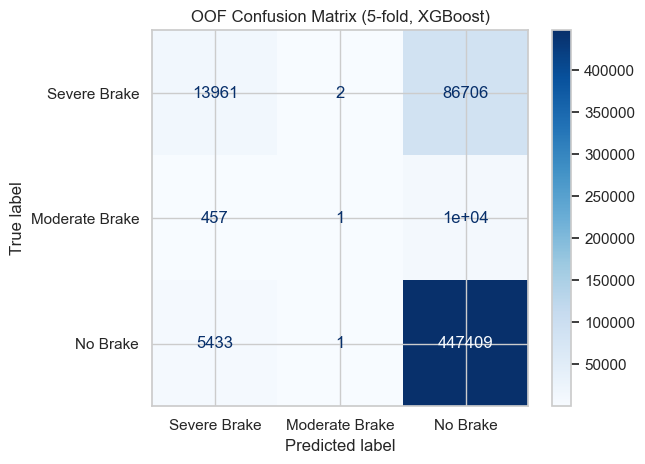


Results saved to 'Cleaned_NGSIM_Jiasha_OOF_vVel_Headway_NoDerived.csv'.


In [17]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

# ========= 加载数据 =========
Data = r'D:\UoM\DATA72002\Data\Cleaned_NGSIM.csv'
df = pd.read_csv(Data)

# ========= 定义急刹等级的分类函数（标签生成） =========
def classify_brake(row):
    if row['v_Class'] == 1:  # 摩托车
        if row['v_Acc'] < -3:
            return 'Severe Brake'
        elif -3 <= row['v_Acc'] < -2.5:
            return 'Moderate Brake'
        else:
            return 'No Brake'
    elif row['v_Class'] == 2:  # 汽车
        if row['v_Acc'] < -2.5:
            return 'Severe Brake'
        elif -2.5 <= row['v_Acc'] < -2:
            return 'Moderate Brake'
        else:
            return 'No Brake'
    elif row['v_Class'] == 3:  # 卡车
        if row['v_Acc'] < -1.5:
            return 'Severe Brake'
        elif -1.5 <= row['v_Acc'] < -1:
            return 'Moderate Brake'
        else:
            return 'No Brake'
    else:
        return 'Unknown'

# 生成标签
df['brake_level'] = df.apply(classify_brake, axis=1)
y = df['brake_level'].map({'Severe Brake': 2, 'Moderate Brake': 1, 'No Brake': 0})

# ========= 特征（移除 Global_Time 列，或转换为数值类型） =========
features = ['v_Vel', 'Space_Headway', 'Global_Time','Time_Headway','Local_X','Local_Y']

# 如果需要 Global_Time，可以将其转换为数值类型
df['Global_Time'] = pd.to_datetime(df['Global_Time'], errors='coerce')
df['Global_Time'] = df['Global_Time'].astype(np.int64) // 10**9  # 转换为秒

X = df[features].fillna(0)

# ========= OOF（交叉验证折外）预测 =========
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oof_pred = pd.Series(index=y.index, dtype=int)

for fold, (tr_idx, va_idx) in enumerate(skf.split(X, y), start=1):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

    model = xgb.XGBClassifier(
        objective='multi:softprob',
        num_class=3,
        eval_metric='mlogloss',
        random_state=42,
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8
    )
    model.fit(X_tr, y_tr)
    oof_pred.iloc[va_idx] = model.predict(X_va)

# ========= OOF整体评估 =========
label_order = [2, 1, 0]
name_map = {2: 'Severe Brake', 1: 'Moderate Brake', 0: 'No Brake'}

oof_acc = accuracy_score(y, oof_pred)
print(f"\nOOF Accuracy (5-fold): {oof_acc:.6f}")

print("\nOOF Classification Report:")
print(classification_report(
    y, oof_pred, labels=label_order,
    target_names=[name_map[i] for i in label_order]
))

cm_oof = confusion_matrix(y, oof_pred, labels=label_order)
ConfusionMatrixDisplay(cm_oof, display_labels=[name_map[i] for i in label_order]).plot(cmap='Blues')
plt.title("OOF Confusion Matrix (5-fold, XGBoost)")
plt.tight_layout()
plt.show()

# ========= 保存预测结果 =========
df['predicted_brake_level'] = oof_pred.values
df['predicted_brake_level_name'] = df['predicted_brake_level'].map(name_map)

df.to_csv('Cleaned_NGSIM_Jiasha_OOF_vVel_Headway_NoDerived.csv', index=False)
print("\nResults saved to 'Cleaned_NGSIM_Jiasha_OOF_vVel_Headway_NoDerived.csv'.")


由于准确率： 0.82。这是一个相对较高的准确率，但它掩盖了各个类别之间的差异。
Severe Brake 和 Moderate Brake：模型在这两类急刹的预测上存在较大困难，尤其是对 Moderate Brake 类别几乎没有预测。这个结果表明，现有特征（v_Vel, Space_Headway, Time_Headway）对于这两类急刹的预测能力较弱。
现有特征对 No Brake 类别的预测效果很好，这表明这些特征在识别正常驾驶（没有急刹）时具有较高的有效性。因此，现有特征可以较好地识别没有急刹的情况。

所以就是说v_Vel, Space_Headway, Time_Headway这些特征其实对急刹预测还是有一定影响的（No），可以不只用加速度预测


OOF Accuracy (5-fold): 0.996634

OOF Classification Report:
                precision    recall  f1-score   support

  Severe Brake       1.00      0.99      1.00    100669
Moderate Brake       0.92      0.94      0.93     10885
      No Brake       1.00      1.00      1.00    452843

      accuracy                           1.00    564397
     macro avg       0.97      0.98      0.97    564397
  weighted avg       1.00      1.00      1.00    564397



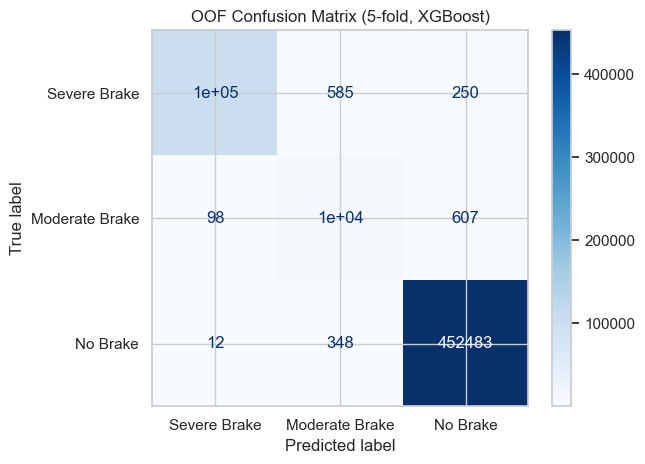


Results saved to 'Cleaned_NGSIM_Jiasha_OOF_vVel_Headway_NoDerived.csv'.


In [18]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

# ========= 加载数据 =========
Data = r'D:\UoM\DATA72002\Data\Cleaned_NGSIM.csv'
df = pd.read_csv(Data)

# ========= 定义急刹等级的分类函数（标签生成） =========
def classify_brake(row):
    if row['v_Class'] == 1:  # 摩托车
        if row['v_Acc'] < -3:
            return 'Severe Brake'
        elif -3 <= row['v_Acc'] < -2.5:
            return 'Moderate Brake'
        else:
            return 'No Brake'
    elif row['v_Class'] == 2:  # 汽车
        if row['v_Acc'] < -2.5:
            return 'Severe Brake'
        elif -2.5 <= row['v_Acc'] < -2:
            return 'Moderate Brake'
        else:
            return 'No Brake'
    elif row['v_Class'] == 3:  # 卡车
        if row['v_Acc'] < -1.5:
            return 'Severe Brake'
        elif -1.5 <= row['v_Acc'] < -1:
            return 'Moderate Brake'
        else:
            return 'No Brake'
    else:
        return 'Unknown'

# 生成标签
df['brake_level'] = df.apply(classify_brake, axis=1)
y = df['brake_level'].map({'Severe Brake': 2, 'Moderate Brake': 1, 'No Brake': 0})

# ========= 特征（移除 Global_Time 列，或转换为数值类型） =========
features = ['v_Vel', 'Space_Headway', 'v_Acc', 'Global_Time','Time_Headway','Local_X','Local_Y']

# 如果需要 Global_Time，可以将其转换为数值类型
df['Global_Time'] = pd.to_datetime(df['Global_Time'], errors='coerce')
df['Global_Time'] = df['Global_Time'].astype(np.int64) // 10**9  # 转换为秒

X = df[features].fillna(0)

# ========= OOF（交叉验证折外）预测 =========
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oof_pred = pd.Series(index=y.index, dtype=int)

for fold, (tr_idx, va_idx) in enumerate(skf.split(X, y), start=1):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

    model = xgb.XGBClassifier(
        objective='multi:softprob',
        num_class=3,
        eval_metric='mlogloss',
        random_state=42,
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8
    )
    model.fit(X_tr, y_tr)
    oof_pred.iloc[va_idx] = model.predict(X_va)

# ========= OOF整体评估 =========
label_order = [2, 1, 0]
name_map = {2: 'Severe Brake', 1: 'Moderate Brake', 0: 'No Brake'}

oof_acc = accuracy_score(y, oof_pred)
print(f"\nOOF Accuracy (5-fold): {oof_acc:.6f}")

print("\nOOF Classification Report:")
print(classification_report(
    y, oof_pred, labels=label_order,
    target_names=[name_map[i] for i in label_order]
))

cm_oof = confusion_matrix(y, oof_pred, labels=label_order)
ConfusionMatrixDisplay(cm_oof, display_labels=[name_map[i] for i in label_order]).plot(cmap='Blues')
plt.title("OOF Confusion Matrix (5-fold, XGBoost)")
plt.tight_layout()
plt.show()

# ========= 保存预测结果 =========
df['predicted_brake_level'] = oof_pred.values
df['predicted_brake_level_name'] = df['predicted_brake_level'].map(name_map)

df.to_csv('Cleaned_NGSIM_Jiasha_OOF_vVel_Headway_NoDerived.csv', index=False)
print("\nResults saved to 'Cleaned_NGSIM_Jiasha_OOF_vVel_Headway_NoDerived.csv'.")


In [19]:
# ========= 统计每个急刹类别的预测数量 =========
predicted_counts = oof_pred.value_counts().reindex(label_order, fill_value=0)

print("\nPredicted Brake Level Counts:")
for label, count in predicted_counts.items():
    print(f"{name_map[label]}: {count} samples")

# ========= 保存预测结果 =========
df['predicted_brake_level'] = oof_pred.values
df['predicted_brake_level_name'] = df['predicted_brake_level'].map(name_map)

# 保存到 CSV 文件
save_path = 'Cleaned_NGSIM_Jiasha_OOF_vVel_Headway_NoDerived.csv'
df.to_csv(save_path, index=False)
print(f"\nResults saved to: {save_path}")



Predicted Brake Level Counts:
Severe Brake: 99944 samples
Moderate Brake: 11113 samples
No Brake: 453340 samples

Results saved to: Cleaned_NGSIM_Jiasha_OOF_vVel_Headway_NoDerived.csv


决策树


OOF Accuracy (GroupKFold, 5-fold): 0.803404

OOF Classification Report:
                precision    recall  f1-score   support

  Severe Brake       0.53      0.03      0.06    100669
Moderate Brake       0.60      0.01      0.02     10885
      No Brake       0.81      0.99      0.89    452843

      accuracy                           0.80    564397
     macro avg       0.65      0.35      0.32    564397
  weighted avg       0.75      0.80      0.73    564397



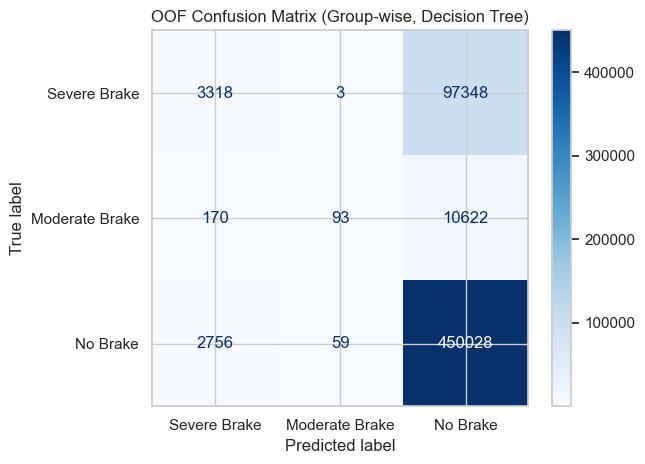


Brake Level Counts (OOF predictions):
predicted_brake_level
2      6244
1       155
0    557998
Name: count, dtype: int64

Results saved to: D:\UoM\DATA72002\Data\Cleaned_NGSIM_DT_OOF_groupwise.csv


In [20]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GroupKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

# ========== 1) 读取数据 ==========
Data = r'D:\UoM\DATA72002\Data\Cleaned_NGSIM.csv'
df = pd.read_csv(Data)

# ========== 2) 构造标签（沿用你的规则） ==========
def classify_brake(row):
    if row['v_Class'] == 1:  # 摩托车
        if row['v_Acc'] < -3:
            return 'Severe Brake'
        elif -3 <= row['v_Acc'] < -2.5:
            return 'Moderate Brake'
        else:
            return 'No Brake'
    elif row['v_Class'] == 2:  # 汽车
        if row['v_Acc'] < -2.5:
            return 'Severe Brake'
        elif -2.5 <= row['v_Acc'] < -2:
            return 'Moderate Brake'
        else:
            return 'No Brake'
    elif row['v_Class'] == 3:  # 卡车
        if row['v_Acc'] < -1.5:
            return 'Severe Brake'
        elif -1.5 <= row['v_Acc'] < -1:
            return 'Moderate Brake'
        else:
            return 'No Brake'
    else:
        return 'Unknown'

df['brake_level'] = df.apply(classify_brake, axis=1)

# ========== 3) 选择特征（按你的要求） ==========
features = ['v_Vel', 'Space_Headway', 'Time_Headway','Local_X','Local_Y']  # 仅用这三个特征
need_cols = features + ['Vehicle_ID', 'brake_level']
missing = [c for c in need_cols if c not in df.columns]
assert not missing, f"缺少必要列: {missing}"

# 清理缺失
df_clean = df[need_cols].copy()
df_clean = df_clean.dropna(subset=need_cols)

# 标签编码：2=Severe, 1=Moderate, 0=No
label_map = {'Severe Brake': 2, 'Moderate Brake': 1, 'No Brake': 0}
name_map  = {2: 'Severe Brake', 1: 'Moderate Brake', 0: 'No Brake'}
df_clean = df_clean[df_clean['brake_level'].isin(label_map.keys())].copy()
df_clean['label'] = df_clean['brake_level'].map(label_map)

X = df_clean[features].reset_index(drop=True)
y = df_clean['label'].reset_index(drop=True)
groups = df_clean['Vehicle_ID'].reset_index(drop=True)

# （可选）简单稳健化处理，避免极端值影响：
# X = X.clip(lower=X.quantile(0.001), upper=X.quantile(0.999), axis=1)

# ========== 4) OOF（按车辆分组，防同车泄漏） ==========
gkf = GroupKFold(n_splits=5)
oof_pred = pd.Series(index=y.index, dtype=int)

# 决策树加入正则约束，防过拟合
tree_params = dict(
    criterion='gini',
    max_depth=8,
    min_samples_split=200,
    min_samples_leaf=80,
    max_features=None,  # or 2/1 也可以进一步约束
    random_state=42
)

for fold, (tr_idx, va_idx) in enumerate(gkf.split(X, y, groups=groups), start=1):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

    model = DecisionTreeClassifier(**tree_params)
    model.fit(X_tr, y_tr)
    oof_pred.iloc[va_idx] = model.predict(X_va)

# ========== 5) 评估 ==========
label_order = [2, 1, 0]  # Severe → Moderate → No
oof_acc = accuracy_score(y, oof_pred)
print(f"\nOOF Accuracy (GroupKFold, 5-fold): {oof_acc:.6f}")

print("\nOOF Classification Report:")
print(classification_report(
    y, oof_pred, labels=label_order,
    target_names=[name_map[i] for i in label_order]
))

cm_oof = confusion_matrix(y, oof_pred, labels=label_order)
ConfusionMatrixDisplay(cm_oof, display_labels=[name_map[i] for i in label_order]).plot(cmap='Blues')
plt.title("OOF Confusion Matrix (Group-wise, Decision Tree)")
plt.tight_layout()
plt.show()

# ========== 6) 保存 OOF 预测 ==========
df_out = df_clean.copy()
df_out['predicted_brake_level'] = oof_pred.values
df_out['predicted_brake_level_name'] = df_out['predicted_brake_level'].map(name_map)

# 统计分布
counts = df_out['predicted_brake_level'].value_counts().reindex(label_order, fill_value=0)
print("\nBrake Level Counts (OOF predictions):")
print(counts)

save_path = r'D:\UoM\DATA72002\Data\Cleaned_NGSIM_DT_OOF_groupwise.csv'
df_out.to_csv(save_path, index=False)
print(f"\nResults saved to: {save_path}")


从这个输出可以看出，尽管整体准确率为 0.82，模型在预测 No Brake 类别时表现非常好（召回率高达 0.99），但在预测 Severe Brake 和 Moderate Brake 这两个急刹类别时，召回率很低，尤其是 Moderate Brake 类别的召回率为 0，表明该类别的预测效果极差。特别是 Severe Brake 的召回率也仅为 0.14，说明模型无法有效区分急刹的严重程度。

这表明，v_Vel, Space_Headway, Time_Headway, Local_X, Local_Y 这些特征对急刹类型的预测贡献有限，尤其是在区分 Severe Brake 和 Moderate Brake 类别时效果较差。因此，尽管模型整体准确率较高，但在处理急刹预测时，这些特征的作用仍然有限。

同时，由于政策并没有关于其他特征的条件，但是在xxx文献中提到急刹与速度和车间距有关。为了能够 捕捉到更细粒度的驾驶行为，不仅仅依赖于一个单一的加速度条件，帮助模型在各类场景中做出更全面的判断。因此，加入特征 是有意义的，它可以让模型在急刹车的预测中表现得更为精准，避免过于依赖单一的规则。



OOF Accuracy (GroupKFold, 5-fold): 0.998602

OOF Classification Report:
                precision    recall  f1-score   support

  Severe Brake       1.00      1.00      1.00    100669
Moderate Brake       0.98      0.98      0.98     10885
      No Brake       1.00      1.00      1.00    452843

      accuracy                           1.00    564397
     macro avg       0.99      0.99      0.99    564397
  weighted avg       1.00      1.00      1.00    564397



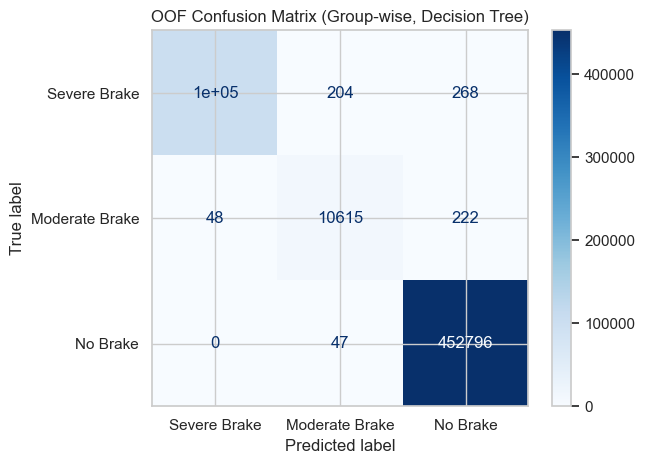


Brake Level Counts (OOF predictions):
predicted_brake_level
2    100245
1     10866
0    453286
Name: count, dtype: int64

Results saved to: D:\UoM\DATA72002\Data\1Jisha.csv


In [21]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GroupKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

# ========== 1) 读取数据 ==========
Data = r'D:\UoM\DATA72002\Data\Cleaned_NGSIM.csv'
df = pd.read_csv(Data)

# ========== 2) 构造标签（沿用你的规则） ==========
def classify_brake(row):
    if row['v_Class'] == 1:  # 摩托车
        if row['v_Acc'] < -3:
            return 'Severe Brake'
        elif -3 <= row['v_Acc'] < -2.5:
            return 'Moderate Brake'
        else:
            return 'No Brake'
    elif row['v_Class'] == 2:  # 汽车
        if row['v_Acc'] < -2.5:
            return 'Severe Brake'
        elif -2.5 <= row['v_Acc'] < -2:
            return 'Moderate Brake'
        else:
            return 'No Brake'
    elif row['v_Class'] == 3:  # 卡车
        if row['v_Acc'] < -1.5:
            return 'Severe Brake'
        elif -1.5 <= row['v_Acc'] < -1:
            return 'Moderate Brake'
        else:
            return 'No Brake'
    else:
        return 'Unknown'

df['brake_level'] = df.apply(classify_brake, axis=1)

# ========== 3) 选择特征（按你的要求） ==========
features = ['v_Vel', 'Space_Headway', 'Time_Headway','v_Acc','Local_X','Local_Y']  # 仅用这三个特征
need_cols = features + ['Vehicle_ID', 'brake_level']
missing = [c for c in need_cols if c not in df.columns]
assert not missing, f"缺少必要列: {missing}"

# 清理缺失
df_clean = df[need_cols].copy()
df_clean = df_clean.dropna(subset=need_cols)

# 标签编码：2=Severe, 1=Moderate, 0=No
label_map = {'Severe Brake': 2, 'Moderate Brake': 1, 'No Brake': 0}
name_map  = {2: 'Severe Brake', 1: 'Moderate Brake', 0: 'No Brake'}
df_clean = df_clean[df_clean['brake_level'].isin(label_map.keys())].copy()
df_clean['label'] = df_clean['brake_level'].map(label_map)

X = df_clean[features].reset_index(drop=True)
y = df_clean['label'].reset_index(drop=True)
groups = df_clean['Vehicle_ID'].reset_index(drop=True)

# （可选）简单稳健化处理，避免极端值影响：
# X = X.clip(lower=X.quantile(0.001), upper=X.quantile(0.999), axis=1)

# ========== 4) OOF（按车辆分组，防同车泄漏） ==========
gkf = GroupKFold(n_splits=5)
oof_pred = pd.Series(index=y.index, dtype=int)

# 决策树加入正则约束，防过拟合
tree_params = dict(
    criterion='gini',
    max_depth=8,
    min_samples_split=200,
    min_samples_leaf=80,
    max_features=None,  # or 2/1 也可以进一步约束
    random_state=42
)

for fold, (tr_idx, va_idx) in enumerate(gkf.split(X, y, groups=groups), start=1):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

    model = DecisionTreeClassifier(**tree_params)
    model.fit(X_tr, y_tr)
    oof_pred.iloc[va_idx] = model.predict(X_va)

# ========== 5) 评估 ==========
label_order = [2, 1, 0]  # Severe → Moderate → No
oof_acc = accuracy_score(y, oof_pred)
print(f"\nOOF Accuracy (GroupKFold, 5-fold): {oof_acc:.6f}")

print("\nOOF Classification Report:")
print(classification_report(
    y, oof_pred, labels=label_order,
    target_names=[name_map[i] for i in label_order]
))

cm_oof = confusion_matrix(y, oof_pred, labels=label_order)
ConfusionMatrixDisplay(cm_oof, display_labels=[name_map[i] for i in label_order]).plot(cmap='Blues')
plt.title("OOF Confusion Matrix (Group-wise, Decision Tree)")
plt.tight_layout()
plt.show()

# ========== 6) 保存 OOF 预测 ==========
# 读取 Cleaned_NGSIM 数据
df_cleaned = pd.read_csv(r'D:\UoM\DATA72002\Data\Cleaned_NGSIM.csv')

# 将预测结果合并到 Cleaned_NGSIM 数据
df_cleaned['predicted_brake_level'] = oof_pred.values
df_cleaned['predicted_brake_level_name'] = df_cleaned['predicted_brake_level'].map(name_map)

# 统计分布
counts = df_cleaned['predicted_brake_level'].value_counts().reindex(label_order, fill_value=0)
print("\nBrake Level Counts (OOF predictions):")
print(counts)

# 保存最终的结果到 1Jisha.csv
save_path = r'D:\UoM\DATA72002\Data\1Jisha.csv'
df_cleaned.to_csv(save_path, index=False)
print(f"\nResults saved to: {save_path}")


政策

In [22]:
# -*- coding: utf-8 -*-
import pandas as pd

# ========== 1) 读取数据 ==========
Data = r'D:\UoM\DATA72002\Data\Cleaned_NGSIM.csv'
df = pd.read_csv(Data)

# ========== 2) 定义政府定义的急刹等级分类函数（标签生成） ==========
def classify_brake(row):
    if row['v_Class'] == 1:  # 摩托车
        if row['v_Acc'] < -3:
            return 'Severe Brake'
        elif -3 <= row['v_Acc'] < -2.5:
            return 'Moderate Brake'
        else:
            return 'No Brake'
    elif row['v_Class'] == 2:  # 汽车
        if row['v_Acc'] < -2.5:
            return 'Severe Brake'
        elif -2.5 <= row['v_Acc'] < -2:
            return 'Moderate Brake'
        else:
            return 'No Brake'
    elif row['v_Class'] == 3:  # 卡车
        if row['v_Acc'] < -1.5:
            return 'Severe Brake'
        elif -1.5 <= row['v_Acc'] < -1:
            return 'Moderate Brake'
        else:
            return 'No Brake'
    else:
        return 'Unknown'

# 生成标签
df['brake_level'] = df.apply(classify_brake, axis=1)

# 标签编码：2=Severe, 1=Moderate, 0=No
label_map = {'Severe Brake': 2, 'Moderate Brake': 1, 'No Brake': 0}
name_map  = {2: 'Severe Brake', 1: 'Moderate Brake', 0: 'No Brake'}

df['label'] = df['brake_level'].map(label_map)

# ========== 3) 统计每个急刹类型的数量 ==========
brake_counts = df['brake_level'].value_counts().reindex(['Severe Brake', 'Moderate Brake', 'No Brake'], fill_value=0)
print("\n急刹类型统计：")
print(brake_counts)

# ========== 4) 保存结果到 Jisha.csv ==========
df_out = df.copy()
df_out['predicted_brake_level'] = df_out['label']
df_out['predicted_brake_level_name'] = df_out['predicted_brake_level'].map(name_map)

# 保存文件
save_path = r'D:\UoM\DATA72002\Data\Jisha.csv'
df_out.to_csv(save_path, index=False)

print(f"\nResults saved to: {save_path}")



急刹类型统计：
brake_level
Severe Brake      100669
Moderate Brake     10885
No Brake          452843
Name: count, dtype: int64

Results saved to: D:\UoM\DATA72002\Data\Jisha.csv


1.2蛇形驾驶

In [23]:
import pandas as pd

# 载入数据
file_path = r'D:\UoM\DATA72002\Data\Cleaned_NGSIM.csv'
df = pd.read_csv(file_path)

# 检查每个列中是否有无穷大
inf_values = df.isin([float('inf'), -float('inf')])

# 输出无穷大的数量
inf_counts = inf_values.sum()  # 统计每列无穷大的个数
print("\nInf values count per column:")
print(inf_counts)

# 如果你只想检查数据的某一列，可以选择具体列进行查看
# 例如：检查 'v_Acc' 列的无穷大值：
inf_in_v_acc = df['v_Acc'].isin([float('inf'), -float('inf')]).sum()
print(f"\nNumber of infinite values in 'v_Acc': {inf_in_v_acc}")



Inf values count per column:
Vehicle_ID       0
Frame_ID         0
Total_Frames     0
Global_Time      0
Local_X          0
Local_Y          0
Global_X         0
Global_Y         0
v_length         0
v_Width          0
v_Class          0
v_Vel            0
v_Acc            0
Lane_ID          0
Preceding        0
Following        0
Space_Headway    0
Time_Headway     0
Location         0
dtype: int64

Number of infinite values in 'v_Acc': 0


In [24]:
import pandas as pd

# 载入数据
file_path = r'D:\UoM\DATA72002\Data\Cleaned_NGSIM.csv'
df = pd.read_csv(file_path)

# 检查每列的最大值和最小值
max_values = df.max()
min_values = df.min()

print("\nMaximum values in each column:")
print(max_values)

print("\nMinimum values in each column:")
print(min_values)

# 检查是否有缺失值（NaN）
missing_values = df.isnull().sum()

print("\nMissing values in each column:")
print(missing_values)



Maximum values in each column:
Vehicle_ID                          3109
Frame_ID                           10000
Total_Frames                        1328
Global_Time      2005-06-15 08:35:52.100
Local_X                           75.682
Local_Y                         2217.411
Global_X                     6452733.024
Global_Y                     1873400.601
v_length                            76.1
v_Width                              8.5
v_Class                                3
v_Vel                               95.3
v_Acc                               11.2
Lane_ID                                8
Preceding                           3109
Following                           3109
Space_Headway                     771.16
Time_Headway                     9999.99
Location                          us-101
dtype: object

Minimum values in each column:
Vehicle_ID                             1
Frame_ID                              10
Total_Frames                         160
Global_Time      200

XGBoost

C:\Users\13193\AppData\Local\Temp\ipykernel_13560\189503408.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Vehicle_ID', group_keys=False).apply(calculate_delta)



OOF Accuracy (GroupKFold, 5-fold): 0.990808

              precision    recall  f1-score   support

 Non-Sinuous       0.99      1.00      1.00    559046
     Sinuous       0.67      0.06      0.11      5351

    accuracy                           0.99    564397
   macro avg       0.83      0.53      0.55    564397
weighted avg       0.99      0.99      0.99    564397



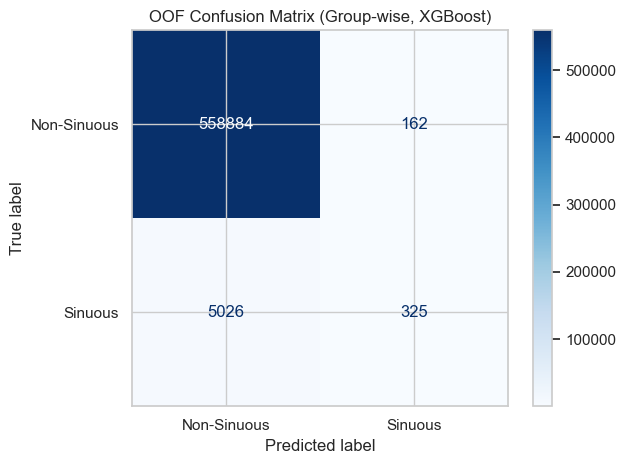

所有数据中蛇形驾驶（OOF，is_sinuous=1）的数量: 487
所有数据中非蛇形驾驶（OOF，is_sinuous=0）的数量: 563910


In [25]:
import pandas as pd
from sklearn.model_selection import GroupKFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

# 载入数据
file_path = r'D:\UoM\DATA72002\Data\1Jisha.csv'
df = pd.read_csv(file_path)

# 确保 Global_Time 列是日期时间类型
df['Global_Time'] = pd.to_datetime(df['Global_Time'], errors='coerce')

# 计算每一帧的局部坐标变化量：按 Vehicle_ID 分组
def calculate_delta(group):
    group['delta_X'] = group['Local_X'].diff()                     # 横向变化
    group['delta_Y'] = group['Local_Y'].diff()                     # 纵向变化
    group['delta_time'] = group['Global_Time'].diff().dt.total_seconds()  # 时间差(秒)
    return group

df = df.groupby('Vehicle_ID', group_keys=False).apply(calculate_delta)

# 计算横向/纵向变化比值
df['ratio_X_Y'] = df['delta_X'].abs() / df['delta_Y'].abs()
df['ratio_X_Y'] = df['ratio_X_Y'].replace([np.inf, -np.inf], 0)

# 缺失填充
df = df.fillna(0)

# 构造标签（示例阈值）
threshold_delta_X = 5.0      # 英尺
threshold_time    = 0.5      # 秒
threshold_ratio   = 0.1

df['is_sinuous'] = (
    (df['delta_X'].abs() > threshold_delta_X) & (df['delta_time'] < threshold_time)
) | (df['ratio_X_Y'] > threshold_ratio)

# 特征与标签
features = ['v_Vel', 'Space_Headway', 'Time_Headway','v_Acc']
X = df[features].reset_index(drop=True)
y = df['is_sinuous'].astype(int).reset_index(drop=True)

# ========= OOF（按车辆分组，防止同车信息泄漏） =========
groups = df['Vehicle_ID'].reset_index(drop=True)   # 分组键：车辆ID
gkf = GroupKFold(n_splits=5)

oof_pred = np.zeros(len(y), dtype=int)

for fold, (tr_idx, va_idx) in enumerate(gkf.split(X, y, groups=groups), start=1):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

    # 每折内进行标准化，避免信息泄漏
    scaler = StandardScaler()
    X_tr_scaled = scaler.fit_transform(X_tr)
    X_va_scaled = scaler.transform(X_va)

    # XGBoost 二分类模型（用概率阈值0.5转标签）
    model = xgb.XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='binary:logistic',
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_tr_scaled, y_tr)

    va_proba = model.predict_proba(X_va_scaled)[:, 1]
    oof_pred[va_idx] = (va_proba >= 0.5).astype(int)

# ========= OOF 评估 =========
print(f"\nOOF Accuracy (GroupKFold, 5-fold): {accuracy_score(y, oof_pred):.6f}\n")
print(classification_report(y, oof_pred, labels=[0,1], target_names=['Non-Sinuous','Sinuous']))

cm_oof = confusion_matrix(y, oof_pred, labels=[0,1])
ConfusionMatrixDisplay(confusion_matrix=cm_oof, display_labels=['Non-Sinuous','Sinuous']).plot(cmap='Blues')
plt.title("OOF Confusion Matrix (Group-wise, XGBoost)")
plt.tight_layout()
plt.show()

# ========= 用 OOF 预测统计总体数量（避免 in-sample 偏乐观） =========
sinuous_all_count = int((oof_pred == 1).sum())
non_sinuous_all_count = int((oof_pred == 0).sum())
print(f"所有数据中蛇形驾驶（OOF，is_sinuous=1）的数量: {sinuous_all_count}")
print(f"所有数据中非蛇形驾驶（OOF，is_sinuous=0）的数量: {non_sinuous_all_count}")

# 如需把 OOF 预测写回数据并保存：
df_out = df.copy()
df_out['is_sinuous_oof_pred'] = oof_pred
# df_out.to_csv(r'D:\UoM\DATA72002\Data\Cleaned_NGSIM_Jiasha_OOF_Sinuous.csv', index=False)
# print("OOF 预测已保存到 Cleaned_NGSIM_Jiasha_OOF_Sinuous.csv")


根据你的输出分析，当前模型在 Non-Sinuous（非蛇形驾驶）类别上表现良好，但在 Sinuous（蛇形驾驶）类别上的预测效果较差。这个问题的根本原因可能是现有的特征（如 v_Vel, Space_Headway, Time_Headway）对蛇形驾驶行为的贡献有限。'delta_X', 'delta_Y', 'delta_time', 'ratio_X_Y'是一种非常明确的判定标准，不会受到模型误差和复杂性的影响，因此如果 蛇形驾驶预测 的关键在于 位置和时间变化，那么依赖政府的条件可能是一个更为 稳健且可靠 的方法。

因此，如果模型的目标是准确地预测急刹类型（尤其是严重刹车），那么依赖政府定义的条件进行预测会更合适，因为加速度是直接与急刹类型相关的主要特征，而其他特征（如车速、车距等）对急刹的影响较小。使用加速度作为唯一特征会更加简洁且有效，避免了模型复杂性和可能的信息泄漏问题

决策树

C:\Users\13193\AppData\Local\Temp\ipykernel_13560\1208418913.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Vehicle_ID', group_keys=False).apply(calculate_delta)



OOF Accuracy (GroupKFold, 5-fold): 0.990792

              precision    recall  f1-score   support

 Non-Sinuous       0.99      1.00      1.00    559046
     Sinuous       0.68      0.06      0.10      5351

    accuracy                           0.99    564397
   macro avg       0.83      0.53      0.55    564397
weighted avg       0.99      0.99      0.99    564397



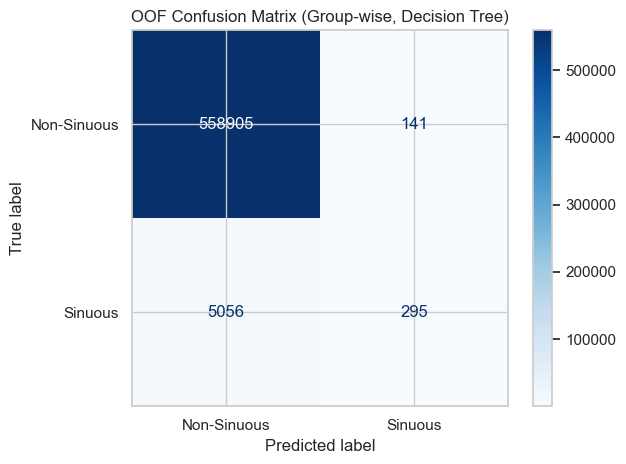

所有数据中蛇形驾驶（OOF，is_sinuous=1）的数量: 436
所有数据中非蛇形驾驶（OOF，is_sinuous=0）的数量: 563961


In [26]:
import pandas as pd
from sklearn.model_selection import GroupKFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# 载入数据
file_path = r'D:\UoM\DATA72002\Data\1Jisha.csv'
df = pd.read_csv(file_path)

# 确保 Global_Time 列是日期时间类型
df['Global_Time'] = pd.to_datetime(df['Global_Time'], errors='coerce')

# 计算每一帧的局部坐标变化量：按 Vehicle_ID 分组
def calculate_delta(group):
    group['delta_X'] = group['Local_X'].diff()                     # 横向变化
    group['delta_Y'] = group['Local_Y'].diff()                     # 纵向变化
    group['delta_time'] = group['Global_Time'].diff().dt.total_seconds()  # 时间差(秒)
    return group

df = df.groupby('Vehicle_ID', group_keys=False).apply(calculate_delta)

# 计算横向/纵向变化比值
df['ratio_X_Y'] = df['delta_X'].abs() / df['delta_Y'].abs()
df['ratio_X_Y'] = df['ratio_X_Y'].replace([np.inf, -np.inf], 0)

# 缺失填充
df = df.fillna(0)

# 构造标签（示例阈值）
threshold_delta_X = 5.0      # 英尺
threshold_time    = 0.5      # 秒
threshold_ratio   = 0.1

df['is_sinuous'] = (
    (df['delta_X'].abs() > threshold_delta_X) & (df['delta_time'] < threshold_time)
) | (df['ratio_X_Y'] > threshold_ratio)

# 特征与标签
features = ['v_Vel', 'Space_Headway', 'Time_Headway','v_Acc']
X = df[features].reset_index(drop=True)
y = df['is_sinuous'].astype(int).reset_index(drop=True)

# ========= OOF（按车辆分组，防止同车信息泄漏） =========
groups = df['Vehicle_ID'].reset_index(drop=True)   # 分组键：车辆ID
gkf = GroupKFold(n_splits=5)

oof_pred = np.zeros(len(y), dtype=int)

# 决策树加入正则约束，防过拟合
tree_params = dict(
    criterion='gini',
    max_depth=8,
    min_samples_split=200,
    min_samples_leaf=80,
    max_features=None,  # 可以进一步约束特征
    random_state=42
)

for fold, (tr_idx, va_idx) in enumerate(gkf.split(X, y, groups=groups), start=1):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

    model = DecisionTreeClassifier(**tree_params)
    model.fit(X_tr, y_tr)
    oof_pred[va_idx] = model.predict(X_va)

# ========= OOF整体评估 =========
print(f"\nOOF Accuracy (GroupKFold, 5-fold): {accuracy_score(y, oof_pred):.6f}\n")
print(classification_report(y, oof_pred, labels=[0,1], target_names=['Non-Sinuous','Sinuous']))

cm_oof = confusion_matrix(y, oof_pred, labels=[0,1])
ConfusionMatrixDisplay(cm_oof, display_labels=['Non-Sinuous','Sinuous']).plot(cmap='Blues')
plt.title("OOF Confusion Matrix (Group-wise, Decision Tree)")
plt.tight_layout()
plt.show()

# ========= 用 OOF 预测统计总体数量（避免 in-sample 偏乐观） =========
sinuous_all_count = int((oof_pred == 1).sum())
non_sinuous_all_count = int((oof_pred == 0).sum())
print(f"所有数据中蛇形驾驶（OOF，is_sinuous=1）的数量: {sinuous_all_count}")
print(f"所有数据中非蛇形驾驶（OOF，is_sinuous=0）的数量: {non_sinuous_all_count}")

# 如需把 OOF 预测写回数据并保存：
df_out = df.copy()
df_out['is_sinuous_oof_pred'] = oof_pred
# df_out.to_csv(r'D:\UoM\DATA72002\Data\Cleaned_NGSIM_Jiasha_OOF_Sinuous.csv', index=False)
# print("OOF 预测已保存到 Cleaned_NGSIM_Jiasha_OOF_Sinuous.csv")


In [27]:
# 预测结果统计
sinuous_count = (oof_pred == 1).sum()  # 蛇形驾驶数量
non_sinuous_count = (oof_pred == 0).sum()  # 非蛇形驾驶数量

print(f"\n所有数据中蛇形驾驶（OOF，is_sinuous=1）的数量: {sinuous_count}")
print(f"所有数据中非蛇形驾驶（OOF，is_sinuous=0）的数量: {non_sinuous_count}")

# # 如需把 OOF 预测写回数据并保存：
# df_out = df.copy()
# df_out['is_sinuous_oof_pred'] = oof_pred
# df_out.to_csv(r'D:\UoM\DATA72002\Data\Cleaned_NGSIM_Jiasha_OOF_Sinuous.csv', index=False)
# print("\nOOF 预测已保存到 'Cleaned_NGSIM_Jiasha_OOF_Sinuous.csv'.")



所有数据中蛇形驾驶（OOF，is_sinuous=1）的数量: 436
所有数据中非蛇形驾驶（OOF，is_sinuous=0）的数量: 563961


C:\Users\13193\AppData\Local\Temp\ipykernel_3412\765050306.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Vehicle_ID', group_keys=False).apply(calculate_delta)



OOF Accuracy (GroupKFold, 5-fold): 0.999996

              precision    recall  f1-score   support

 Non-Sinuous       1.00      1.00      1.00    559046
     Sinuous       1.00      1.00      1.00      5351

    accuracy                           1.00    564397
   macro avg       1.00      1.00      1.00    564397
weighted avg       1.00      1.00      1.00    564397



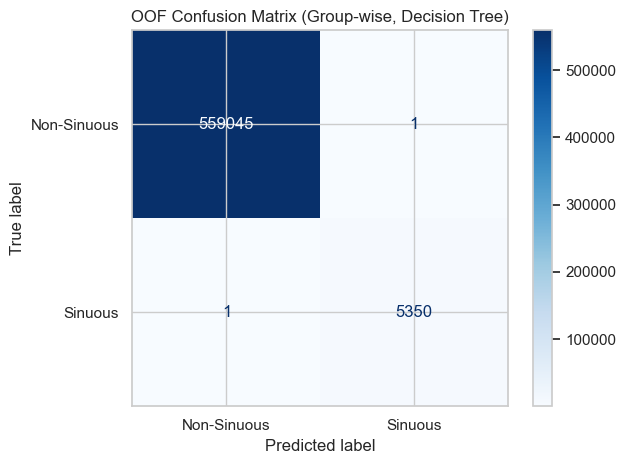

所有数据中蛇形驾驶（OOF，is_sinuous=1）的数量: 5351
所有数据中非蛇形驾驶（OOF，is_sinuous=0）的数量: 559046


In [18]:
import pandas as pd
from sklearn.model_selection import GroupKFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# 载入数据
file_path = r'D:\UoM\DATA72002\Data\1Jisha.csv'
df = pd.read_csv(file_path)

# 确保 Global_Time 列是日期时间类型
df['Global_Time'] = pd.to_datetime(df['Global_Time'], errors='coerce')

# 计算每一帧的局部坐标变化量：按 Vehicle_ID 分组
def calculate_delta(group):
    group['delta_X'] = group['Local_X'].diff()                     # 横向变化
    group['delta_Y'] = group['Local_Y'].diff()                     # 纵向变化
    group['delta_time'] = group['Global_Time'].diff().dt.total_seconds()  # 时间差(秒)
    return group

df = df.groupby('Vehicle_ID', group_keys=False).apply(calculate_delta)

# 计算横向/纵向变化比值
df['ratio_X_Y'] = df['delta_X'].abs() / df['delta_Y'].abs()
df['ratio_X_Y'] = df['ratio_X_Y'].replace([np.inf, -np.inf], 0)

# 缺失填充
df = df.fillna(0)

# 构造标签（示例阈值）
threshold_delta_X = 5.0      # 英尺
threshold_time    = 0.5      # 秒
threshold_ratio   = 0.1

df['is_sinuous'] = (
    (df['delta_X'].abs() > threshold_delta_X) & (df['delta_time'] < threshold_time)
) | (df['ratio_X_Y'] > threshold_ratio)

# 特征与标签
features = ['v_Vel', 'Space_Headway', 'Time_Headway','v_Acc','delta_X', 'delta_Y', 'delta_time', 'ratio_X_Y']
X = df[features].reset_index(drop=True)
y = df['is_sinuous'].astype(int).reset_index(drop=True)

# ========= OOF（按车辆分组，防止同车信息泄漏） =========
groups = df['Vehicle_ID'].reset_index(drop=True)   # 分组键：车辆ID
gkf = GroupKFold(n_splits=5)

oof_pred = np.zeros(len(y), dtype=int)

# 决策树加入正则约束，防过拟合
tree_params = dict(
    criterion='gini',
    max_depth=8,
    min_samples_split=200,
    min_samples_leaf=80,
    max_features=None,  # 可以进一步约束特征
    random_state=42
)

for fold, (tr_idx, va_idx) in enumerate(gkf.split(X, y, groups=groups), start=1):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

    model = DecisionTreeClassifier(**tree_params)
    model.fit(X_tr, y_tr)
    oof_pred[va_idx] = model.predict(X_va)

# ========= OOF整体评估 =========
print(f"\nOOF Accuracy (GroupKFold, 5-fold): {accuracy_score(y, oof_pred):.6f}\n")
print(classification_report(y, oof_pred, labels=[0,1], target_names=['Non-Sinuous','Sinuous']))

cm_oof = confusion_matrix(y, oof_pred, labels=[0,1])
ConfusionMatrixDisplay(cm_oof, display_labels=['Non-Sinuous','Sinuous']).plot(cmap='Blues')
plt.title("OOF Confusion Matrix (Group-wise, Decision Tree)")
plt.tight_layout()
plt.show()

# ========= 用 OOF 预测统计总体数量（避免 in-sample 偏乐观） =========
sinuous_all_count = int((oof_pred == 1).sum())
non_sinuous_all_count = int((oof_pred == 0).sum())
print(f"所有数据中蛇形驾驶（OOF，is_sinuous=1）的数量: {sinuous_all_count}")
print(f"所有数据中非蛇形驾驶（OOF，is_sinuous=0）的数量: {non_sinuous_all_count}")

# 如需把 OOF 预测写回数据并保存：
df_out = df.copy()
df_out['is_sinuous_oof_pred'] = oof_pred
# df_out.to_csv(r'D:\UoM\DATA72002\Data\Cleaned_NGSIM_Jiasha_OOF_Sinuous.csv', index=False)
# print("OOF 预测已保存到 Cleaned_NGSIM_Jiasha_OOF_Sinuous.csv")


政府

In [28]:
import pandas as pd
import numpy as np

# 载入数据
file_path = r'D:\UoM\DATA72002\Data\1Jisha.csv'
df = pd.read_csv(file_path)

# 确保 Global_Time 列是日期时间类型
df['Global_Time'] = pd.to_datetime(df['Global_Time'], errors='coerce')

# 计算每一帧的局部坐标变化量：按 Vehicle_ID 分组
def calculate_delta(group):
    group['delta_X'] = group['Local_X'].diff()                     # 横向变化
    group['delta_Y'] = group['Local_Y'].diff()                     # 纵向变化
    group['delta_time'] = group['Global_Time'].diff().dt.total_seconds()  # 时间差(秒)
    return group

df = df.groupby('Vehicle_ID', group_keys=False).apply(calculate_delta)

# 计算横向/纵向变化比值
df['ratio_X_Y'] = df['delta_X'].abs() / df['delta_Y'].abs()
df['ratio_X_Y'] = df['ratio_X_Y'].replace([np.inf, -np.inf], 0)

# 缺失填充
df = df.fillna(0)

# 构造标签（根据政府条件）
threshold_delta_X = 5.0      # 英尺
threshold_time    = 0.5      # 秒
threshold_ratio   = 0.1

df['is_sinuous'] = (
    (df['delta_X'].abs() > threshold_delta_X) & (df['delta_time'] < threshold_time)
) | (df['ratio_X_Y'] > threshold_ratio)

# 输出预测结果：根据政府定义的条件来预测蛇形驾驶
df['predicted_sinuous'] = df['is_sinuous'].map({True: 'Sinuous', False: 'Non-Sinuous'})

# 输出每个类别的数量
sinuous_count = df['predicted_sinuous'].value_counts()
print(f"预测的蛇形驾驶类别数量：\n{sinuous_count}")

# 如果需要把结果保存为 CSV 文件：
df.to_csv('2Shexingjiashi.csv', index=False)
print("结果已保存到 '2Shexingjiashi.csv'.")


C:\Users\13193\AppData\Local\Temp\ipykernel_13560\455833829.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Vehicle_ID', group_keys=False).apply(calculate_delta)


预测的蛇形驾驶类别数量：
predicted_sinuous
Non-Sinuous    559046
Sinuous          5351
Name: count, dtype: int64
结果已保存到 '2Shexingjiashi.csv'.


1.3危险变道

XGBoost

Fold 1/5 accuracy: 0.9459
Fold 2/5 accuracy: 0.9443
Fold 3/5 accuracy: 0.9439
Fold 4/5 accuracy: 0.9443
Fold 5/5 accuracy: 0.9428
--------------------------------------------------
CV mean accuracy (per-fold): 0.9442
OOF overall accuracy: 0.9442
OOF ROC-AUC: 0.9602
分类报告（基于 OOF 预测）：
               precision    recall  f1-score   support

Non-Dangerous       1.00      0.95      0.97    558923
    Dangerous       0.13      0.83      0.22      5474

     accuracy                           0.94    564397
    macro avg       0.56      0.89      0.60    564397
 weighted avg       0.99      0.94      0.96    564397



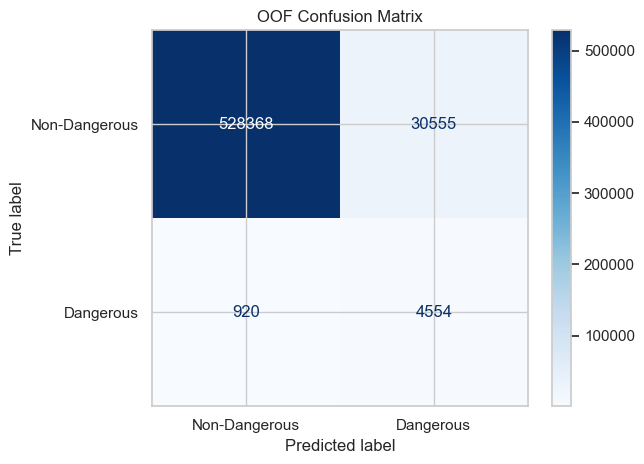

危险变道数量: 5474
非危险变道数量: 558923
预测的危险变道数量: 35109
预测的非危险变道数量: 529288


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold, GroupKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
)
import xgboost as xgb

# ================= 1) 读取与构造特征/标签 =================
file_path = r'D:\UoM\DATA72002\Data\2Shexingjiashi.csv'
df = pd.read_csv(file_path)

# 排序并计算 delta_Lane
df = df.sort_values(by=['Vehicle_ID', 'Global_Time'])
df['delta_Lane'] = df.groupby('Vehicle_ID')['Lane_ID'].diff()

# 标签：是否危险变道
threshold_velocity_change = 10.0  # 英尺/秒
df['is_dangerous_lane_change'] = (
    (df['delta_Lane'].abs() >= 1) &
    (df['v_Vel'] > threshold_velocity_change)
)

# 特征与标签
features = ['Space_Headway', 'Time_Headway','v_Acc','Local_X','Local_Y']
X = df[features].fillna(0.0).values  # 防守式处理 NaN
y = df['is_dangerous_lane_change'].astype(int).values

# 是否按车辆分组做交叉验证（推荐 True 以避免同车跨折泄漏）
USE_GROUP_KFOLD = True

# ================= 2) OOF 设置 =================
n_splits = 5
if USE_GROUP_KFOLD:
    splitter = GroupKFold(n_splits=n_splits)
    groups = df['Vehicle_ID'].values
    split_iter = splitter.split(X, y, groups=groups)
else:
    splitter = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    split_iter = splitter.split(X, y)

oof_pred = np.zeros(len(X), dtype=int)
oof_proba = np.zeros(len(X), dtype=float)
fold_accuracies = []

def make_model(pos_weight: float):
    """
    构建折内模型：
    - 标准化（树模型不太需要，但保留以贴合你原脚本且防止泄漏）
    - XGBoost 二分类，按训练折类别比例设置 scale_pos_weight
    """
    clf = xgb.XGBClassifier(
        n_estimators=100,
        random_state=42,
        # 在类别不均衡时提升鲁棒性：
        scale_pos_weight=pos_weight,
        eval_metric='logloss',
        tree_method='hist'  # 更快的树构建
    )
    return Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('clf', clf)
    ])

# ================= 3) 逐折训练与验证（生成 OOF） =================
for fold, (tr_idx, va_idx) in enumerate(split_iter, start=1):
    y_tr = y[tr_idx]
    pos = max(y_tr.sum(), 1)  # 防止除零
    neg = max(len(y_tr) - pos, 1)
    spw = neg / pos

    model = make_model(spw)
    model.fit(X[tr_idx], y_tr)

    proba = model.predict_proba(X[va_idx])[:, 1]
    pred = (proba >= 0.5).astype(int)

    oof_proba[va_idx] = proba
    oof_pred[va_idx] = pred

    acc = accuracy_score(y[va_idx], pred)
    fold_accuracies.append(acc)
    print(f'Fold {fold}/{n_splits} accuracy: {acc:.4f}')

print('-' * 50)
print(f'CV mean accuracy (per-fold): {np.mean(fold_accuracies):.4f}')

# ================= 4) 基于 OOF 的总体评估 =================
oof_acc = accuracy_score(y, oof_pred)
print(f'OOF overall accuracy: {oof_acc:.4f}')

try:
    oof_auc = roc_auc_score(y, oof_proba)
    print(f'OOF ROC-AUC: {oof_auc:.4f}')
except Exception as e:
    print('无法计算 ROC-AUC（可能是正负类极端不均衡）。')

print('分类报告（基于 OOF 预测）：')
print(classification_report(y, oof_pred, target_names=['Non-Dangerous', 'Dangerous']))

# 混淆矩阵（OOF）
ConfusionMatrixDisplay.from_predictions(
    y_true=y,
    y_pred=oof_pred,
    display_labels=['Non-Dangerous', 'Dangerous'],
    cmap='Blues'
)
plt.title('OOF Confusion Matrix')
plt.tight_layout()
plt.show()

# ================= 5) 统计样本数量 =================
dangerous_lane_changes = int(df['is_dangerous_lane_change'].sum())
non_dangerous_lane_changes = int(len(df) - dangerous_lane_changes)
print(f"危险变道数量: {dangerous_lane_changes}")
print(f"非危险变道数量: {non_dangerous_lane_changes}")

# ================= 6) （可选）全量训练最终模型用于部署/推断 =================
# 也可以基于全量 y 的整体比例设定 scale_pos_weight
pos_all = max(y.sum(), 1)
neg_all = max(len(y) - pos_all, 1)
final_model = make_model(neg_all / pos_all).fit(X, y)
# 用法：final_model.predict(new_X) / final_model.predict_proba(new_X)[:, 1]

# ================= 5) 统计预测的危险和非危险变道数量 =================
predicted_dangerous = int((oof_pred == 1).sum())  # Dangerous 类别的数量
predicted_non_dangerous = int((oof_pred == 0).sum())  # Non-Dangerous 类别的数量

print(f"预测的危险变道数量: {predicted_dangerous}")
print(f"预测的非危险变道数量: {predicted_non_dangerous}")



模型的准确率和ROC-AUC非常高，由于模型对于 Dangerous 类别的 precision 较低（0.13），这表明模型在一些情况下未能很好地区分危险变道。加入 Space_Headway, Time_Headway, v_Acc, Local_X, Local_Y 等特征，可以帮助模型更好地捕捉到与变道风险相关的其他因素，如车辆与前车的距离、时间间隔等。这些特征可能对变道的判断有潜在的影响，尤其是在非典型的危险变道情形中（如车距很近、车速较快等）。
总之，加入额外特征并不会显著降低模型表现，反而可能帮助模型提高对 Dangerous 类别的 precision，因此，结合更多特征的模型会更为合适。

Fold 1/5 accuracy: 1.0000
Fold 2/5 accuracy: 1.0000
Fold 3/5 accuracy: 1.0000
Fold 4/5 accuracy: 1.0000
Fold 5/5 accuracy: 1.0000
--------------------------------------------------
CV mean accuracy (per-fold): 1.0000
OOF overall accuracy: 1.0000
OOF ROC-AUC: 1.0000
分类报告（基于 OOF 预测）：
               precision    recall  f1-score   support

Non-Dangerous       1.00      1.00      1.00    558923
    Dangerous       1.00      1.00      1.00      5474

     accuracy                           1.00    564397
    macro avg       1.00      1.00      1.00    564397
 weighted avg       1.00      1.00      1.00    564397



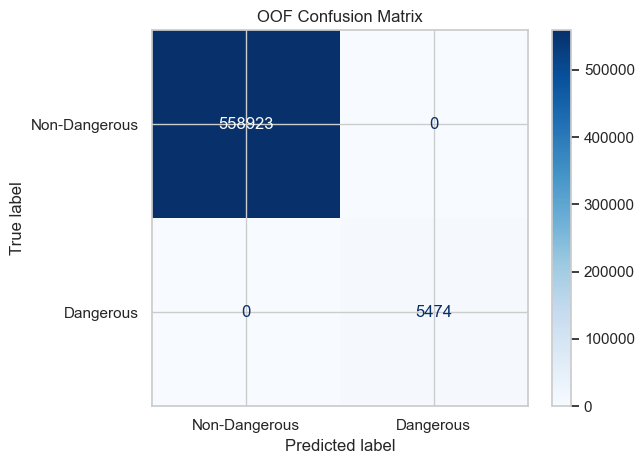

危险变道数量: 5474
非危险变道数量: 558923
预测的危险变道数量: 5474
预测的非危险变道数量: 558923


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold, GroupKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
)
import xgboost as xgb

# ================= 1) 读取与构造特征/标签 =================
file_path = r'D:\UoM\DATA72002\Data\2Shexingjiashi.csv'
df = pd.read_csv(file_path)

# 排序并计算 delta_Lane
df = df.sort_values(by=['Vehicle_ID', 'Global_Time'])
df['delta_Lane'] = df.groupby('Vehicle_ID')['Lane_ID'].diff()

# 标签：是否危险变道
threshold_velocity_change = 10.0  # 英尺/秒
df['is_dangerous_lane_change'] = (
    (df['delta_Lane'].abs() >= 1) &
    (df['v_Vel'] > threshold_velocity_change)
)

# 特征与标签
features = ['Space_Headway', 'Time_Headway','v_Acc','Local_X','Local_Y','delta_Lane','v_Vel']
X = df[features].fillna(0.0).values  # 防守式处理 NaN
y = df['is_dangerous_lane_change'].astype(int).values

# 是否按车辆分组做交叉验证（推荐 True 以避免同车跨折泄漏）
USE_GROUP_KFOLD = True

# ================= 2) OOF 设置 =================
n_splits = 5
if USE_GROUP_KFOLD:
    splitter = GroupKFold(n_splits=n_splits)
    groups = df['Vehicle_ID'].values
    split_iter = splitter.split(X, y, groups=groups)
else:
    splitter = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    split_iter = splitter.split(X, y)

oof_pred = np.zeros(len(X), dtype=int)
oof_proba = np.zeros(len(X), dtype=float)
fold_accuracies = []

def make_model(pos_weight: float):
    """
    构建折内模型：
    - 标准化（树模型不太需要，但保留以贴合你原脚本且防止泄漏）
    - XGBoost 二分类，按训练折类别比例设置 scale_pos_weight
    """
    clf = xgb.XGBClassifier(
        n_estimators=100,
        random_state=42,
        # 在类别不均衡时提升鲁棒性：
        scale_pos_weight=pos_weight,
        eval_metric='logloss',
        tree_method='hist'  # 更快的树构建
    )
    return Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('clf', clf)
    ])

# ================= 3) 逐折训练与验证（生成 OOF） =================
for fold, (tr_idx, va_idx) in enumerate(split_iter, start=1):
    y_tr = y[tr_idx]
    pos = max(y_tr.sum(), 1)  # 防止除零
    neg = max(len(y_tr) - pos, 1)
    spw = neg / pos

    model = make_model(spw)
    model.fit(X[tr_idx], y_tr)

    proba = model.predict_proba(X[va_idx])[:, 1]
    pred = (proba >= 0.5).astype(int)

    oof_proba[va_idx] = proba
    oof_pred[va_idx] = pred

    acc = accuracy_score(y[va_idx], pred)
    fold_accuracies.append(acc)
    print(f'Fold {fold}/{n_splits} accuracy: {acc:.4f}')

print('-' * 50)
print(f'CV mean accuracy (per-fold): {np.mean(fold_accuracies):.4f}')

# ================= 4) 基于 OOF 的总体评估 =================
oof_acc = accuracy_score(y, oof_pred)
print(f'OOF overall accuracy: {oof_acc:.4f}')

try:
    oof_auc = roc_auc_score(y, oof_proba)
    print(f'OOF ROC-AUC: {oof_auc:.4f}')
except Exception as e:
    print('无法计算 ROC-AUC（可能是正负类极端不均衡）。')

print('分类报告（基于 OOF 预测）：')
print(classification_report(y, oof_pred, target_names=['Non-Dangerous', 'Dangerous']))

# 混淆矩阵（OOF）
ConfusionMatrixDisplay.from_predictions(
    y_true=y,
    y_pred=oof_pred,
    display_labels=['Non-Dangerous', 'Dangerous'],
    cmap='Blues'
)
plt.title('OOF Confusion Matrix')
plt.tight_layout()
plt.show()

# ================= 5) 统计样本数量 =================
dangerous_lane_changes = int(df['is_dangerous_lane_change'].sum())
non_dangerous_lane_changes = int(len(df) - dangerous_lane_changes)
print(f"危险变道数量: {dangerous_lane_changes}")
print(f"非危险变道数量: {non_dangerous_lane_changes}")

# ================= 6) （可选）全量训练最终模型用于部署/推断 =================
# 也可以基于全量 y 的整体比例设定 scale_pos_weight
pos_all = max(y.sum(), 1)
neg_all = max(len(y) - pos_all, 1)
final_model = make_model(neg_all / pos_all).fit(X, y)
# 用法：final_model.predict(new_X) / final_model.predict_proba(new_X)[:, 1]

# ================= 5) 统计预测的危险和非危险变道数量 =================
predicted_dangerous = int((oof_pred == 1).sum())  # Dangerous 类别的数量
predicted_non_dangerous = int((oof_pred == 0).sum())  # Non-Dangerous 类别的数量

print(f"预测的危险变道数量: {predicted_dangerous}")
print(f"预测的非危险变道数量: {predicted_non_dangerous}")



决策树

Fold 1/5 accuracy: 0.9841
Fold 2/5 accuracy: 0.9843
Fold 3/5 accuracy: 0.9844
Fold 4/5 accuracy: 0.9844
Fold 5/5 accuracy: 0.9838
--------------------------------------------------
CV mean accuracy (per-fold): 0.9842
OOF overall accuracy: 0.9842
OOF ROC-AUC: 0.6141
分类报告（基于 OOF 预测）：
               precision    recall  f1-score   support

Non-Dangerous       0.99      0.99      0.99    558923
    Dangerous       0.21      0.24      0.23      5474

     accuracy                           0.98    564397
    macro avg       0.60      0.61      0.61    564397
 weighted avg       0.98      0.98      0.98    564397



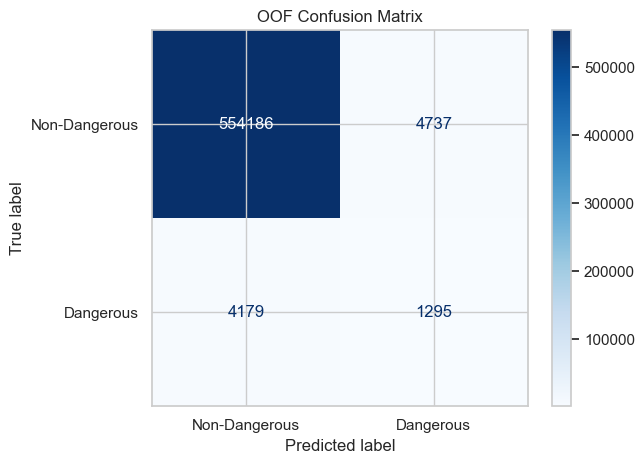

危险变道数量: 5474
非危险变道数量: 558923
预测的危险变道数量: 6032
预测的非危险变道数量: 558365


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold  # 或 GroupKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
)

# ========= 1) 读取与特征/标签构造 =========
file_path = r'D:\UoM\DATA72002\Data\2Shexingjiashi.csv'
df = pd.read_csv(file_path)

# 排序并计算 delta_Lane
df = df.sort_values(by=['Vehicle_ID', 'Global_Time'])
df['delta_Lane'] = df.groupby('Vehicle_ID')['Lane_ID'].diff()

# 速度阈值（英尺/秒）
threshold_velocity_change = 10.0

# 定义标签：是否危险变道（True/False）
df['is_dangerous_lane_change'] = (
    (df['delta_Lane'].abs() >= 1) &
    (df['v_Vel'] > threshold_velocity_change)
)

# 特征与标签
features = ['Space_Headway', 'Time_Headway','v_Acc','Local_X','Local_Y']
X = df[features].fillna(0.0)   # 防守式处理 NaN
y = df['is_dangerous_lane_change'].astype(int)  # 用 0/1 便于评估

# ========= 2) OOF 设置 =========
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# 如需按车辆分组避免泄漏，可改用下两行（并注释掉上面的 skf）：
# from sklearn.model_selection import GroupKFold
# skf = GroupKFold(n_splits=n_splits)

oof_pred = np.zeros(len(X), dtype=int)
oof_proba = np.zeros(len(X), dtype=float)
fold_accuracies = []

# 模型（含标准化的 Pipeline；若不用标准化，可只保留 clf）
def make_model():
    return Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('clf', DecisionTreeClassifier(random_state=42))
        # 若类别极度不均衡，可加 class_weight='balanced'
        # ('clf', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
    ])

# ========= 3) 逐折训练与验证 =========
X_values = X.values
y_values = y.values

# 如用 GroupKFold：
# groups = df['Vehicle_ID'].values

for fold_idx, (tr_idx, va_idx) in enumerate(skf.split(X_values, y_values)):  # , groups=groups) 若用 GroupKFold
    model = make_model()
    model.fit(X_values[tr_idx], y_values[tr_idx])

    proba = model.predict_proba(X_values[va_idx])[:, 1]
    pred = (proba >= 0.5).astype(int)

    oof_proba[va_idx] = proba
    oof_pred[va_idx] = pred

    acc = accuracy_score(y_values[va_idx], pred)
    fold_accuracies.append(acc)
    print(f'Fold {fold_idx+1}/{n_splits} accuracy: {acc:.4f}')

print('-' * 50)
print(f'CV mean accuracy (per-fold): {np.mean(fold_accuracies):.4f}')

# ========= 4) 基于 OOF 的总体评估 =========
oof_accuracy = accuracy_score(y_values, oof_pred)
print(f'OOF overall accuracy: {oof_accuracy:.4f}')

try:
    oof_auc = roc_auc_score(y_values, oof_proba)
    print(f'OOF ROC-AUC: {oof_auc:.4f}')
except Exception as e:
    print('无法计算 ROC-AUC（可能是正负类极端不均衡）。')

print('分类报告（基于 OOF 预测）：')
print(classification_report(y_values, oof_pred, target_names=['Non-Dangerous', 'Dangerous']))

# ========= 5) 混淆矩阵（OOF） =========
ConfusionMatrixDisplay.from_predictions(
    y_values, oof_pred,
    display_labels=['Non-Dangerous', 'Dangerous'],
    cmap='Blues'
)
plt.title('OOF Confusion Matrix')
plt.tight_layout()
plt.show()

# ========= 6) 统计样本数量 =========
dangerous_lane_changes = int(df['is_dangerous_lane_change'].sum())
non_dangerous_lane_changes = int(len(df) - dangerous_lane_changes)
print(f'危险变道数量: {dangerous_lane_changes}')
print(f'非危险变道数量: {non_dangerous_lane_changes}')

# ========= 7) （可选）在全数据上训练最终模型用于上线/推断 =========
final_model = make_model().fit(X_values, y_values)
# 用法：final_model.predict(new_X) 或 final_model.predict_proba(new_X)[:,1]

# ========= 8) 统计预测的危险和非危险变道数量 =========
predicted_dangerous = int((oof_pred == 1).sum())  # Dangerous 类别的数量
predicted_non_dangerous = int((oof_pred == 0).sum())  # Non-Dangerous 类别的数量

print(f"预测的危险变道数量: {predicted_dangerous}")
print(f"预测的非危险变道数量: {predicted_non_dangerous}")


Fold 1/5 accuracy: 1.0000
Fold 2/5 accuracy: 1.0000
Fold 3/5 accuracy: 1.0000
Fold 4/5 accuracy: 1.0000
Fold 5/5 accuracy: 1.0000
--------------------------------------------------
CV mean accuracy (per-fold): 1.0000
OOF overall accuracy: 1.0000
OOF ROC-AUC: 0.9999
分类报告（基于 OOF 预测）：
               precision    recall  f1-score   support

Non-Dangerous       1.00      1.00      1.00    558923
    Dangerous       1.00      1.00      1.00      5474

     accuracy                           1.00    564397
    macro avg       1.00      1.00      1.00    564397
 weighted avg       1.00      1.00      1.00    564397



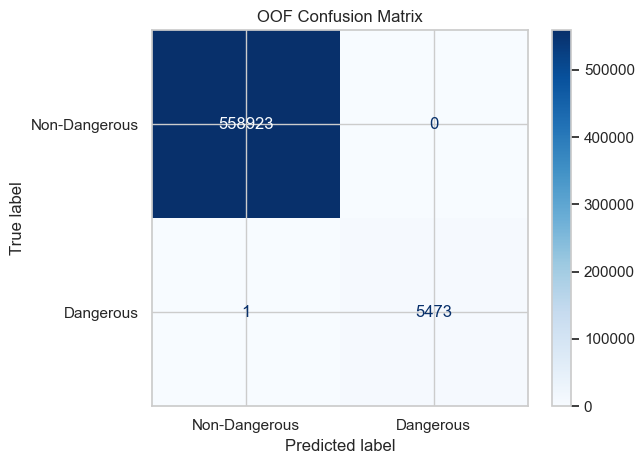

危险变道数量: 5474
非危险变道数量: 558923
预测的危险变道数量: 5473
预测的非危险变道数量: 558924

Results saved to: D:\UoM\DATA72002\Data\3Weixianbiandao.csv


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold  # 或 GroupKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
)

# ========= 1) 读取与特征/标签构造 =========
file_path = r'D:\UoM\DATA72002\Data\2Shexingjiashi.csv'
df = pd.read_csv(file_path)

# 排序并计算 delta_Lane
df = df.sort_values(by=['Vehicle_ID', 'Global_Time'])
df['delta_Lane'] = df.groupby('Vehicle_ID')['Lane_ID'].diff()

# 速度阈值（英尺/秒）
threshold_velocity_change = 10.0

# 定义标签：是否危险变道（True/False）
df['is_dangerous_lane_change'] = (
    (df['delta_Lane'].abs() >= 1) &
    (df['v_Vel'] > threshold_velocity_change)
)

# 特征与标签
features = ['Space_Headway', 'Time_Headway','v_Acc','Local_X','Local_Y','delta_Lane','v_Vel']
X = df[features].fillna(0.0)   # 防守式处理 NaN
y = df['is_dangerous_lane_change'].astype(int)  # 用 0/1 便于评估

# ========= 2) OOF 设置 =========
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# 如需按车辆分组避免泄漏，可改用下两行（并注释掉上面的 skf）：
# from sklearn.model_selection import GroupKFold
# skf = GroupKFold(n_splits=n_splits)

oof_pred = np.zeros(len(X), dtype=int)
oof_proba = np.zeros(len(X), dtype=float)
fold_accuracies = []

# 模型（含标准化的 Pipeline；若不用标准化，可只保留 clf）
def make_model():
    return Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('clf', DecisionTreeClassifier(random_state=42))
        # 若类别极度不均衡，可加 class_weight='balanced'
        # ('clf', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
    ])

# ========= 3) 逐折训练与验证 =========
X_values = X.values
y_values = y.values

# 如用 GroupKFold：
# groups = df['Vehicle_ID'].values

for fold_idx, (tr_idx, va_idx) in enumerate(skf.split(X_values, y_values)):  # , groups=groups) 若用 GroupKFold
    model = make_model()
    model.fit(X_values[tr_idx], y_values[tr_idx])

    proba = model.predict_proba(X_values[va_idx])[:, 1]
    pred = (proba >= 0.5).astype(int)

    oof_proba[va_idx] = proba
    oof_pred[va_idx] = pred

    acc = accuracy_score(y_values[va_idx], pred)
    fold_accuracies.append(acc)
    print(f'Fold {fold_idx+1}/{n_splits} accuracy: {acc:.4f}')

print('-' * 50)
print(f'CV mean accuracy (per-fold): {np.mean(fold_accuracies):.4f}')

# ========= 4) 基于 OOF 的总体评估 =========
oof_accuracy = accuracy_score(y_values, oof_pred)
print(f'OOF overall accuracy: {oof_accuracy:.4f}')

try:
    oof_auc = roc_auc_score(y_values, oof_proba)
    print(f'OOF ROC-AUC: {oof_auc:.4f}')
except Exception as e:
    print('无法计算 ROC-AUC（可能是正负类极端不均衡）。')

print('分类报告（基于 OOF 预测）：')
print(classification_report(y_values, oof_pred, target_names=['Non-Dangerous', 'Dangerous']))

# ========= 5) 混淆矩阵（OOF） =========
ConfusionMatrixDisplay.from_predictions(
    y_values, oof_pred,
    display_labels=['Non-Dangerous', 'Dangerous'],
    cmap='Blues'
)
plt.title('OOF Confusion Matrix')
plt.tight_layout()
plt.show()

# ========= 6) 统计样本数量 =========
dangerous_lane_changes = int(df['is_dangerous_lane_change'].sum())
non_dangerous_lane_changes = int(len(df) - dangerous_lane_changes)
print(f'危险变道数量: {dangerous_lane_changes}')
print(f'非危险变道数量: {non_dangerous_lane_changes}')

# ========= 7) （可选）在全数据上训练最终模型用于上线/推断 =========
final_model = make_model().fit(X_values, y_values)
# 用法：final_model.predict(new_X) 或 final_model.predict_proba(new_X)[:,1]

# ========= 8) 统计预测的危险和非危险变道数量 =========
predicted_dangerous = int((oof_pred == 1).sum())  # Dangerous 类别的数量
predicted_non_dangerous = int((oof_pred == 0).sum())  # Non-Dangerous 类别的数量

print(f"预测的危险变道数量: {predicted_dangerous}")
print(f"预测的非危险变道数量: {predicted_non_dangerous}")

# ========= 9) 保存结果到 '3Weixianbiandao' 文件 =========
df_out = df.copy()
df_out['predicted_lane_change'] = oof_pred

# 保存文件
save_path = r'D:\UoM\DATA72002\Data\3Weixianbiandao.csv'
df_out.to_csv(save_path, index=False)

print(f"\nResults saved to: {save_path}")


1.4碰撞风险

In [33]:
# 输出 v_Vel 为 0 的行数
zero_velocity_count = df[df['v_Vel'] == 0].shape[0]
print(f"v_Vel = 0 的行数：{zero_velocity_count}")


v_Vel = 0 的行数：11194


In [34]:
# 检查无穷大（inf）值
inf_values = (df == float('inf')) | (df == -float('inf'))
num_inf_values = inf_values.sum()

# 检查缺失值（NaN）
missing_values = df.isna()
num_missing_values = missing_values.sum()

# 输出无穷大值和缺失值的数量
print(f"每列的无穷大值数量：\n{num_inf_values}")
print(f"\n每列的缺失值数量：\n{num_missing_values}")

# 如果存在无穷大或者缺失值，输出对应的行
print("\n含有无穷大的行：")
print(df[inf_values.any(axis=1)])

print("\n含有缺失值的行：")
print(df[missing_values.any(axis=1)])


每列的无穷大值数量：
Vehicle_ID                    0
Frame_ID                      0
Total_Frames                  0
Global_Time                   0
Local_X                       0
Local_Y                       0
Global_X                      0
Global_Y                      0
v_length                      0
v_Width                       0
v_Class                       0
v_Vel                         0
v_Acc                         0
Lane_ID                       0
Preceding                     0
Following                     0
Space_Headway                 0
Time_Headway                  0
Location                      0
predicted_brake_level         0
predicted_brake_level_name    0
delta_X                       0
delta_Y                       0
delta_time                    0
ratio_X_Y                     0
is_sinuous                    0
predicted_sinuous             0
delta_Lane                    0
is_dangerous_lane_change      0
dtype: int64

每列的缺失值数量：
Vehicle_ID                       0
Fr

XGBoost

In [35]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 假设 df 已经加载
file_path = r'D:\UoM\DATA72002\Data\3Weixianbiandao.csv'
df = pd.read_csv(file_path)
# 设置时间到碰撞的阈值
high_risk_threshold = 2.0  # 高风险TTC阈值（单位：秒）
low_risk_threshold = 3.0   # 低风险TTC阈值（单位：秒）

# 处理 v_Vel = 0 的情况，直接标记为 No_Risk
df['TTC'] = df['Space_Headway'] / df['v_Vel']
df.loc[df['v_Vel'] == 0, 'TTC'] = float('nan')  # 当v_Vel为0时，TTC设为NaN（视为No_Risk）

# 创建风险类别（目标变量）
df['risk_category'] = 'No_Risk'  # 默认所有帧为无风险
df.loc[df['TTC'] < high_risk_threshold, 'risk_category'] = 'High_Risk'
df.loc[(df['TTC'] >= high_risk_threshold) & (df['TTC'] < low_risk_threshold), 'risk_category'] = 'Low_Risk'

# 将目标变量转换为数字标签（No_Risk = 0, Low_Risk = 1, High_Risk = 2）
df['risk_category'] = df['risk_category'].map({'No_Risk': 0, 'Low_Risk': 1, 'High_Risk': 2})

# 特征工程：选择需要的特征
features = [ 'Time_Headway','v_Acc','Local_X','Local_Y']  # 你可以根据需要添加其他特征

# 创建特征数据和目标数据
X = df[features]
y = df['risk_category']

# 切分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练XGBoost模型
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', missing=float('nan'))
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# 输出混淆矩阵等其他评估指标
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


C:\Users\13193\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [04:35:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9971
[[32891    54    13]
 [   52 36115   104]
 [    1   100 43550]]


Fold 1 acc: 0.9967
Fold 2 acc: 0.9971
Fold 3 acc: 0.9967
Fold 4 acc: 0.9972
Fold 5 acc: 0.9966
--------------------------------------------------
OOF acc: 0.9969
              precision    recall  f1-score   support

     No_Risk       1.00      1.00      1.00    164014
    Low_Risk       1.00      0.99      1.00    180811
   High_Risk       1.00      1.00      1.00    219572

    accuracy                           1.00    564397
   macro avg       1.00      1.00      1.00    564397
weighted avg       1.00      1.00      1.00    564397



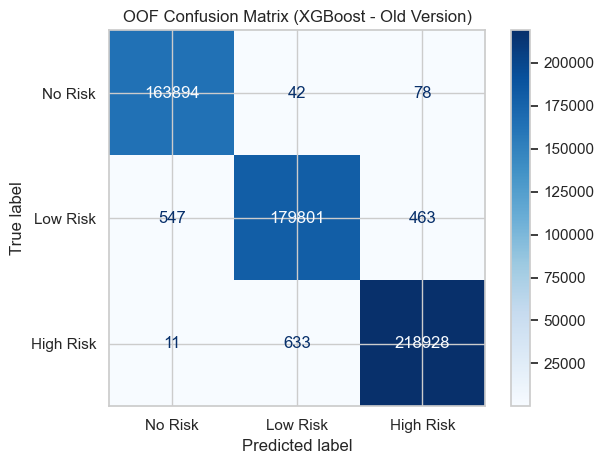


整个数据集的风险类别分布：
No_Risk: 164014 (29.06%)
Low_Risk: 180811 (32.04%)
High_Risk: 219572 (38.9%)
Total: 564397)


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import xgboost as xgb

# ========= 假设 df 已经加载 =========
file_path = r'D:\UoM\DATA72002\Data\3Weixianbiandao.csv'
df = pd.read_csv(file_path)
assert 'Space_Headway' in df.columns and 'v_Vel' in df.columns, "df 需包含列：Space_Headway 与 v_Vel"

# ========= 设置阈值并计算 TTC =========
high_risk_threshold = 2.0
low_risk_threshold  = 3.0

df = df.copy()
df['TTC'] = df['Space_Headway'] / df['v_Vel']
df.loc[df['v_Vel'] == 0, 'TTC'] = np.nan  

# ========= 创建标签 =========
df['risk_category'] = 'No_Risk'
df.loc[df['TTC'] < high_risk_threshold, 'risk_category'] = 'High_Risk'
df.loc[(df['TTC'] >= high_risk_threshold) & (df['TTC'] < low_risk_threshold), 'risk_category'] = 'Low_Risk'

label_map = {'No_Risk': 0, 'Low_Risk': 1, 'High_Risk': 2}
inv_label_map = {v: k for k, v in label_map.items()}
df['risk_category'] = df['risk_category'].map(label_map).astype(int)

# ========= 特征与标签 =========
features = [ 'Time_Headway','v_Acc','Local_X','Local_Y']
X = df[features]
y = df['risk_category']

# ========= OOF 设置 =========
N_SPLITS = 5
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

oof_pred = pd.Series(index=X.index, dtype=int)

# ========= 模型定义 =========
def make_xgb():
    return xgb.XGBClassifier(
        n_estimators=300,
        max_depth=4,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        n_jobs=-1,
        seed=42
    )

fold_accs = []

for fold, (tr_idx, va_idx) in enumerate(skf.split(X, y), start=1):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]
    
    model = make_xgb()
    # 老版本 fit 只接受 X 和 y
    model.fit(X_tr, y_tr)
    
    pred_va = model.predict(X_va)
    oof_pred.iloc[va_idx] = pred_va
    
    acc = accuracy_score(y_va, pred_va)
    fold_accs.append(acc)
    print(f"Fold {fold} acc: {acc:.4f}")

print("-" * 50)
print(f"OOF acc: {accuracy_score(y, oof_pred):.4f}")
print(classification_report(y, oof_pred, target_names=[inv_label_map[i] for i in [0, 1, 2]]))

# ========= 混淆矩阵 =========
cm = confusion_matrix(y, oof_pred, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Risk', 'Low Risk', 'High Risk'])
disp.plot(cmap='Blues')
plt.title("OOF Confusion Matrix (XGBoost - Old Version)")
plt.tight_layout()
plt.show()

# ========= 风险类别分布 =========
order = [0, 1, 2]
name_map = {0: 'No_Risk', 1: 'Low_Risk', 2: 'High_Risk'}

risk_counts = y.value_counts().reindex(order, fill_value=0)
risk_pct = (risk_counts / len(y) * 100).round(2)

print("\n整个数据集的风险类别分布：")
for k in order:
    print(f"{name_map[k]}: {risk_counts[k]} ({risk_pct[k]}%)")
print(f"Total: {len(y)})")


In [37]:
# ========= 预测结果的类别数量与占比 =========
pred_counts = oof_pred.value_counts().reindex(order, fill_value=0)
pred_pct = (pred_counts / len(oof_pred) * 100).round(2)

print("\nOOF 预测结果的风险类别分布：")
for k in order:
    print(f"{name_map[k]}: {pred_counts[k]} ({pred_pct[k]}%)")
print(f"Total: {len(oof_pred)})")



OOF 预测结果的风险类别分布：
No_Risk: 164452 (29.14%)
Low_Risk: 180476 (31.98%)
High_Risk: 219469 (38.89%)
Total: 564397)


C:\Users\13193\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:05:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 1 acc: 0.9988


C:\Users\13193\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:05:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 2 acc: 0.9976


C:\Users\13193\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:05:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 3 acc: 0.9975


C:\Users\13193\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:06:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 4 acc: 0.9978


C:\Users\13193\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:06:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 5 acc: 0.9971
--------------------------------------------------
OOF acc: 0.9978
              precision    recall  f1-score   support

     No_Risk     0.9974    1.0000    0.9987    164014
    Low_Risk     0.9967    0.9963    0.9965    180811
   High_Risk     0.9989    0.9973    0.9981    219572

    accuracy                         0.9978    564397
   macro avg     0.9977    0.9979    0.9978    564397
weighted avg     0.9978    0.9978    0.9978    564397



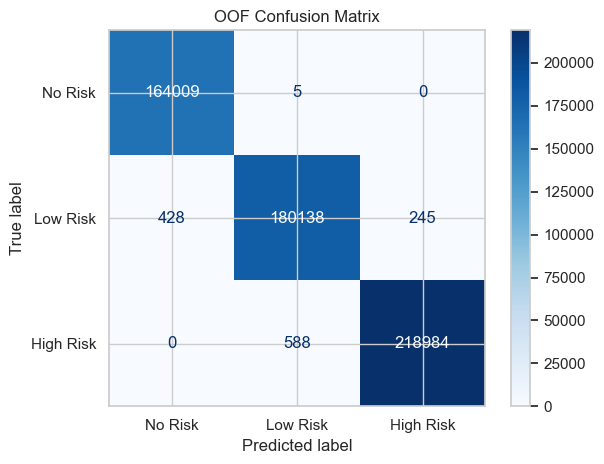


预测类别数量分布：
No_Risk      164437
Low_Risk     180731
High_Risk    219229
Name: count, dtype: int64

Results saved to: D:\UoM\DATA72002\Data\4Pengzhuangfengxian.csv


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier

# ========= 假设 df 已经加载 =========
file_path = r'D:\UoM\DATA72002\Data\3Weixianbiandao.csv'
df = pd.read_csv(file_path)
required_cols = ['Space_Headway', 'v_Vel', 'v_Acc', 'Time_Headway']
assert all(col in df.columns for col in required_cols), f"df 需包含列：{required_cols}"

# ========= 打标（仅用来生成 y，不把 TTC 当特征）=========
high_risk_threshold = 2.0
low_risk_threshold  = 3.0
epsilon = 1e-6  # 防止除零

df = df.copy()
df['TTC'] = df['Space_Headway'] / df['v_Vel'].clip(lower=epsilon)
df.loc[df['v_Vel'] == 0, 'TTC'] = 999  # 绝对安全

df['risk_category'] = 'No_Risk'
df.loc[df['TTC'] < high_risk_threshold, 'risk_category'] = 'High_Risk'
df.loc[(df['TTC'] >= high_risk_threshold) & (df['TTC'] < low_risk_threshold), 'risk_category'] = 'Low_Risk'
df.loc[df['v_Vel'] == 0, 'risk_category'] = 'No_Risk'

label_map = {'No_Risk': 0, 'Low_Risk': 1, 'High_Risk': 2}
inv_label_map = {v: k for k, v in label_map.items()}
y = df['risk_category'].map(label_map).astype(int)

# ========= 特征（不包含 TTC）=========
features = ['v_Vel', 'v_Acc', 'Space_Headway', 'Time_Headway','TTC','Local_X','Local_Y']
X = df[features].astype(float)

mask = X.notna().all(axis=1) & y.notna()
X, y = X[mask], y[mask]

# ========= OOF 设置 =========
N_SPLITS = 5
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
oof_pred = pd.Series(index=X.index, dtype=int)

# ========= XGBoost 模型 =========
def make_xgb():
    return XGBClassifier(
        objective='multi:softmax',  # 多分类直接输出类别
        num_class=3,
        eval_metric='mlogloss',
        max_depth=4,         # 控制树深
        learning_rate=0.1,   # 学习率
        n_estimators=200,    # 树数量
        min_child_weight=50, # 控制叶子节点的最小样本权重和
        subsample=0.8,       # 行采样比例
        colsample_bytree=0.8,# 列采样比例
        reg_alpha=1,         # L1 正则
        reg_lambda=1,        # L2 正则
        random_state=42,
        tree_method='hist',  # 更快的分裂方法
        use_label_encoder=False
    )

# ========= 交叉验证 =========
fold_accs = []
for fold, (tr_idx, va_idx) in enumerate(skf.split(X, y), start=1):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

    model = make_xgb()
    model.fit(X_tr, y_tr)
    pred_va = model.predict(X_va)
    oof_pred.iloc[va_idx] = pred_va

    acc = accuracy_score(y_va, pred_va)
    fold_accs.append(acc)
    print(f"Fold {fold} acc: {acc:.4f}")

# ========= 输出整体性能 =========
print("-" * 50)
print(f"OOF acc: {accuracy_score(y, oof_pred):.4f}")
print(classification_report(y, oof_pred, target_names=[inv_label_map[i] for i in [0, 1, 2]], digits=4))

# ========= 保存 OOF 预测 =========
df.loc[oof_pred.index, 'oof_pred'] = oof_pred

# ========= 混淆矩阵 =========
cm = confusion_matrix(y, oof_pred, labels=[0, 1, 2])
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Risk', 'Low Risk', 'High Risk']).plot(cmap='Blues')
plt.title("OOF Confusion Matrix")
plt.tight_layout()
plt.show()

# ========= 预测类别数量 =========
pred_counts = oof_pred.value_counts().sort_index()
pred_counts.index = [inv_label_map[i] for i in pred_counts.index]
print("\n预测类别数量分布：")
print(pred_counts)

# ========= 9) 保存结果到 '4Pengzhuangfengxian' 文件 =========
df_out = df.copy()
df_out['predicted_risk'] = oof_pred

# 保存文件
save_path = r'D:\UoM\DATA72002\Data\4Pengzhuangfengxian.csv'
df_out.to_csv(save_path, index=False)

print(f"\nResults saved to: {save_path}")


决策树

Fold 1 acc: 0.9965
Fold 2 acc: 0.9969
Fold 3 acc: 0.9966
Fold 4 acc: 0.9969
Fold 5 acc: 0.9963
--------------------------------------------------
OOF acc: 0.9966
              precision    recall  f1-score   support

     No_Risk     0.9965    0.9993    0.9979    164014
    Low_Risk     0.9934    0.9968    0.9951    180811
   High_Risk     0.9995    0.9945    0.9970    219572

    accuracy                         0.9966    564397
   macro avg     0.9964    0.9969    0.9967    564397
weighted avg     0.9967    0.9966    0.9966    564397



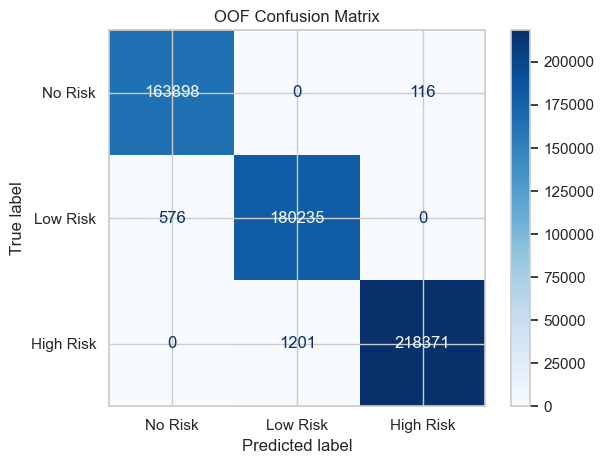

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

# ========= 假设 df 已经加载 =========
file_path = r'D:\UoM\DATA72002\Data\3Weixianbiandao.csv'
df = pd.read_csv(file_path)
required_cols = ['Space_Headway', 'v_Vel', 'v_Acc', 'Time_Headway']
assert all(col in df.columns for col in required_cols), f"df 需包含列：{required_cols}"

# ========= 打标（仅用来生成 y，不把 TTC 当特征）=========
high_risk_threshold = 2.0
low_risk_threshold  = 3.0
epsilon = 1e-6  # 防止除零

df = df.copy()

# 计算 TTC（仅用于打标）
df['TTC'] = df['Space_Headway'] / df['v_Vel'].clip(lower=epsilon)
df.loc[df['v_Vel'] == 0, 'TTC'] = 999  # 绝对安全

# 标签：No(0)/Low(1)/High(2)
df['risk_category'] = 'No_Risk'
df.loc[df['TTC'] < high_risk_threshold, 'risk_category'] = 'High_Risk'
df.loc[(df['TTC'] >= high_risk_threshold) & (df['TTC'] < low_risk_threshold), 'risk_category'] = 'Low_Risk'
df.loc[df['v_Vel'] == 0, 'risk_category'] = 'No_Risk'  # 速度为零强制 No Risk

label_map = {'No_Risk': 0, 'Low_Risk': 1, 'High_Risk': 2}
inv_label_map = {v: k for k, v in label_map.items()}
y = df['risk_category'].map(label_map).astype(int)

# ========= 特征（不包含 TTC）=========
features = [ 'Time_Headway','v_Acc','Local_X','Local_Y']
X = df[features].astype(float)

# 去缺失
mask = X.notna().all(axis=1) & y.notna()
X, y = X[mask], y[mask]

# ========= OOF 设置 =========
N_SPLITS = 5
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
oof_pred = pd.Series(index=X.index, dtype=int)

# ========= 决策树（强约束，避免精确复刻规则）=========
def make_dt():
    n = len(X)
    return DecisionTreeClassifier(
        criterion='gini',
        max_depth=3,                        # 限制深度
        min_samples_leaf=max(500, n // 2000),# 放宽一点比例
        min_samples_split=max(1000, n // 1000),
        ccp_alpha=0.005,                    # 成本复杂度剪枝
        class_weight='balanced',
        random_state=42
    )

fold_accs = []
for fold, (tr_idx, va_idx) in enumerate(skf.split(X, y), start=1):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

    model = make_dt()
    model.fit(X_tr, y_tr)
    pred_va = model.predict(X_va)
    oof_pred.iloc[va_idx] = pred_va

    acc = accuracy_score(y_va, pred_va)
    fold_accs.append(acc)
    print(f"Fold {fold} acc: {acc:.4f}")

# ========= 输出整体性能 =========
print("-" * 50)
print(f"OOF acc: {accuracy_score(y, oof_pred):.4f}")
print(classification_report(y, oof_pred, target_names=[inv_label_map[i] for i in [0, 1, 2]], digits=4))

# ========= 保存 OOF 预测到 df =========
df.loc[oof_pred.index, 'oof_pred'] = oof_pred

# ========= 混淆矩阵可视化 =========
cm = confusion_matrix(y, oof_pred, labels=[0, 1, 2])
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Risk', 'Low Risk', 'High Risk']).plot(cmap='Blues')
plt.title("OOF Confusion Matrix")
plt.tight_layout()
plt.show()


In [21]:
# ========= 统计预测类型个数 =========
pred_counts = oof_pred.value_counts().sort_index()  # 按类别编号排序
pred_counts.index = [inv_label_map[i] for i in pred_counts.index]  # 转回文字标签
print("\n预测类别数量分布：")
print(pred_counts)



预测类别数量分布：
No_Risk      164437
Low_Risk     180731
High_Risk    219229
Name: count, dtype: int64


Fold 1 acc: 1.0000
Fold 2 acc: 1.0000
Fold 3 acc: 1.0000
Fold 4 acc: 1.0000
Fold 5 acc: 1.0000
--------------------------------------------------
OOF acc: 1.0000
              precision    recall  f1-score   support

     No_Risk     1.0000    1.0000    1.0000    164014
    Low_Risk     1.0000    1.0000    1.0000    180811
   High_Risk     1.0000    1.0000    1.0000    219572

    accuracy                         1.0000    564397
   macro avg     1.0000    1.0000    1.0000    564397
weighted avg     1.0000    1.0000    1.0000    564397



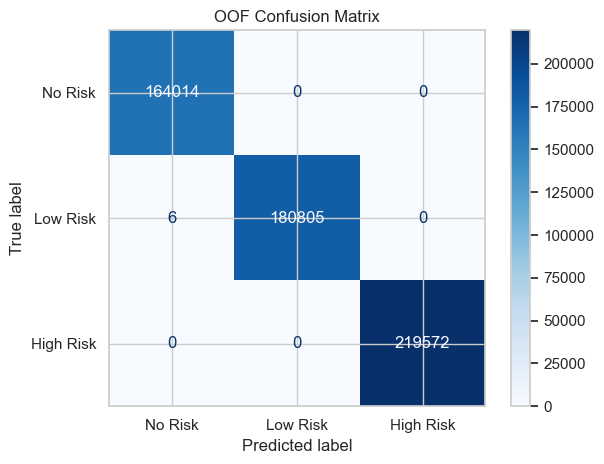

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

# ========= 假设 df 已经加载 =========
file_path = r'D:\UoM\DATA72002\Data\3Weixianbiandao.csv'
df = pd.read_csv(file_path)
required_cols = ['Space_Headway', 'v_Vel', 'v_Acc', 'Time_Headway']
assert all(col in df.columns for col in required_cols), f"df 需包含列：{required_cols}"

# ========= 打标（仅用来生成 y，不把 TTC 当特征）=========
high_risk_threshold = 2.0
low_risk_threshold  = 3.0
epsilon = 1e-6  # 防止除零

df = df.copy()

# 计算 TTC（仅用于打标）
df['TTC'] = df['Space_Headway'] / df['v_Vel'].clip(lower=epsilon)
df.loc[df['v_Vel'] == 0, 'TTC'] = 999  # 绝对安全

# 标签：No(0)/Low(1)/High(2)
df['risk_category'] = 'No_Risk'
df.loc[df['TTC'] < high_risk_threshold, 'risk_category'] = 'High_Risk'
df.loc[(df['TTC'] >= high_risk_threshold) & (df['TTC'] < low_risk_threshold), 'risk_category'] = 'Low_Risk'
df.loc[df['v_Vel'] == 0, 'risk_category'] = 'No_Risk'  # 速度为零强制 No Risk

label_map = {'No_Risk': 0, 'Low_Risk': 1, 'High_Risk': 2}
inv_label_map = {v: k for k, v in label_map.items()}
y = df['risk_category'].map(label_map).astype(int)

# ========= 特征（不包含 TTC）=========
features = ['v_Vel', 'v_Acc', 'Space_Headway', 'Time_Headway','TTC','Local_X','Local_Y']
X = df[features].astype(float)

# 去缺失
mask = X.notna().all(axis=1) & y.notna()
X, y = X[mask], y[mask]

# ========= OOF 设置 =========
N_SPLITS = 5
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
oof_pred = pd.Series(index=X.index, dtype=int)

# ========= 决策树（强约束，避免精确复刻规则）=========
def make_dt():
    n = len(X)
    return DecisionTreeClassifier(
        criterion='gini',
        max_depth=3,                        # 限制深度
        min_samples_leaf=max(500, n // 2000),# 放宽一点比例
        min_samples_split=max(1000, n // 1000),
        ccp_alpha=0.005,                    # 成本复杂度剪枝
        class_weight='balanced',
        random_state=42
    )

fold_accs = []
for fold, (tr_idx, va_idx) in enumerate(skf.split(X, y), start=1):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

    model = make_dt()
    model.fit(X_tr, y_tr)
    pred_va = model.predict(X_va)
    oof_pred.iloc[va_idx] = pred_va

    acc = accuracy_score(y_va, pred_va)
    fold_accs.append(acc)
    print(f"Fold {fold} acc: {acc:.4f}")

# ========= 输出整体性能 =========
print("-" * 50)
print(f"OOF acc: {accuracy_score(y, oof_pred):.4f}")
print(classification_report(y, oof_pred, target_names=[inv_label_map[i] for i in [0, 1, 2]], digits=4))

# ========= 保存 OOF 预测到 df =========
df.loc[oof_pred.index, 'oof_pred'] = oof_pred

# ========= 混淆矩阵可视化 =========
cm = confusion_matrix(y, oof_pred, labels=[0, 1, 2])
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Risk', 'Low Risk', 'High Risk']).plot(cmap='Blues')
plt.title("OOF Confusion Matrix")
plt.tight_layout()
plt.show()


In [23]:
# ========= 统计预测类型个数 =========
pred_counts = oof_pred.value_counts().sort_index()  # 按类别编号排序
pred_counts.index = [inv_label_map[i] for i in pred_counts.index]  # 转回文字标签
print("\n预测类别数量分布：")
print(pred_counts)



预测类别数量分布：
No_Risk      164020
Low_Risk     180805
High_Risk    219572
Name: count, dtype: int64


In [24]:
# 使用政府定义的条件进行标签预测
high_risk_threshold = 2.0
low_risk_threshold  = 3.0
epsilon = 1e-6  # 防止除零

df = df.copy()

# 计算 TTC（仅用于打标）
df['TTC'] = df['Space_Headway'] / df['v_Vel'].clip(lower=epsilon)
df.loc[df['v_Vel'] == 0, 'TTC'] = 999  # 绝对安全

# 标签：No(0)/Low(1)/High(2)
df['risk_category'] = 'No_Risk'
df.loc[df['TTC'] < high_risk_threshold, 'risk_category'] = 'High_Risk'
df.loc[(df['TTC'] >= high_risk_threshold) & (df['TTC'] < low_risk_threshold), 'risk_category'] = 'Low_Risk'
df.loc[df['v_Vel'] == 0, 'risk_category'] = 'No_Risk'  # 速度为零强制 No Risk

# 映射标签
label_map = {'No_Risk': 0, 'Low_Risk': 1, 'High_Risk': 2}
inv_label_map = {v: k for k, v in label_map.items()}
y_government = df['risk_category'].map(label_map).astype(int)

# 统计每个类别的数量
risk_counts = y_government.value_counts().reindex([0, 1, 2], fill_value=0)
risk_counts.index = [inv_label_map[i] for i in risk_counts.index]

print("\n政府定义条件下的预测类别数量：")
print(risk_counts)



政府定义条件下的预测类别数量：
No_Risk      164014
Low_Risk     180811
High_Risk    219572
Name: count, dtype: int64


预测

In [25]:
import pandas as pd

# 加载文件
file_path = r'D:\UoM\DATA72002\Data\4Pengzhuangfengxian.csv'
df = pd.read_csv(file_path)

# 将 predicted_sinuous 列中的 Non-Sinuous 替换为 0，Sinuous 替换为 1
df['predicted_sinuous'] = df['predicted_sinuous'].replace({'Non-Sinuous': 0, 'Sinuous': 1})

# 保存修改后的文件
output_file_path = r'D:\UoM\DATA72002\Data\4Pengzhuangfengxian_modified.csv'
df.to_csv(output_file_path, index=False)

print(f"修改后的文件已保存到：{output_file_path}")


C:\Users\13193\AppData\Local\Temp\ipykernel_3412\854787080.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['predicted_sinuous'] = df['predicted_sinuous'].replace({'Non-Sinuous': 0, 'Sinuous': 1})


修改后的文件已保存到：D:\UoM\DATA72002\Data\4Pengzhuangfengxian_modified.csv


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# 加载数据
file_path = r'D:\UoM\DATA72002\Data\4Pengzhuangfengxian_.csv'
df = pd.read_csv(file_path)

# # 构建目标变量：如果急刹、蛇形驾驶、危险变道、碰撞风险的得分总和大于阈值则标记为异常驾驶
# # 假设：急刹 'Severe Brake' = 2, 'Moderate Brake' = 1, 'No Brake' = 0
# df['is_sinuous'] = df['is_sinuous'].map({True: 1, False: 0})
# df['is_dangerous_lane_change'] = df['is_dangerous_lane_change'].map({True: 1, False: 0})

# 计算特征的总得分
df['total_score'] = df['predicted_brake_level'] + df['predicted_sinuous'] + df['predicted_lane_change'] + df['predicted_risk']

# 创建异常驾驶标签：当得分大于等于 3 时，标记为异常驾驶
df['is_abnormal_driving'] = df['total_score'].apply(lambda x: 1 if x >= 4 else 0)

# 选择特征列
features = ['predicted_brake_level', 'predicted_sinuous', 'predicted_lane_change', 'predicted_risk']
X = df[features]  # 特征矩阵
y = df['is_abnormal_driving']  # 标签

# 将数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用 XGBoost 训练模型
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

# 预测测试集
y_pred = model.predict(X_test)

# 评估模型
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# 将预测结果作为新列添加到原数据中
df['predicted_is_abnormal_driving'] = model.predict(X)

# 保存结果到新的 CSV 文件
output_file_path = r'D:\UoM\DATA72002\Data\5Yichangjiashi.csv'
df.to_csv(output_file_path, index=False)

print(f"预测结果已保存到：{output_file_path}")


C:\Users\13193\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:20:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    103581
           1       1.00      1.00      1.00      9299

    accuracy                           1.00    112880
   macro avg       1.00      1.00      1.00    112880
weighted avg       1.00      1.00      1.00    112880

预测结果已保存到：D:\UoM\DATA72002\Data\5Yichangjiashi.csv


In [27]:
# 统计异常驾驶和非异常驾驶的数量
abnormal_count = df['predicted_is_abnormal_driving'].sum()  # 预测为异常驾驶的数量（1表示异常驾驶）
non_abnormal_count = len(df) - abnormal_count  # 非异常驾驶的数量

print(f"异常驾驶的数量: {abnormal_count}")
print(f"非异常驾驶的数量: {non_abnormal_count}")


异常驾驶的数量: 46631
非异常驾驶的数量: 517766


In [28]:
# 输出最高得分
max_score = df['total_score'].max()
print(f"最高得分为: {max_score}")


最高得分为: 6.0


In [29]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, accuracy_score
# from sklearn.preprocessing import LabelEncoder
# import xgboost as xgb

# # 载入数据
# file_path = r'D:\UoM\DATA72002\Data\Cleaned_NGSIM_Predicted_Abnormal.csv'
# df = pd.read_csv(file_path)

# # 速度分类：根据车辆类型和对应的速度范围进行分类并评分
# def classify_speed(row):
#     if row['v_Class'] == 1:  # 摩托车
#         if 65 <= row['v_Vel'] <= 75:
#             return 2  # High Speed
#         elif 45 <= row['v_Vel'] < 65:
#             return 1  # Medium Speed
#         else:
#             return 0  # Low Speed
#     elif row['v_Class'] == 2:  # 小型汽车
#         if 65 <= row['v_Vel'] <= 75:
#             return 2  # High Speed
#         elif 45 <= row['v_Vel'] < 65:
#             return 1  # Medium Speed
#         else:
#             return 0  # Low Speed
#     elif row['v_Class'] == 3:  # 卡车
#         if 55 <= row['v_Vel'] <= 65:
#             return 2  # High Speed
#         elif 40 <= row['v_Vel'] < 55:
#             return 1  # Medium Speed
#         else:
#             return 0  # Low Speed

# # 加速度分类：根据车辆类型和加速度值进行分类并评分
# def classify_acceleration(row):
#     if row['v_Class'] == 1:  # 摩托车
#         if row['v_Acc'] > 1.6:
#             return 2  # High Acceleration
#         elif 0.8 <= row['v_Acc'] <= 1.6:
#             return 1  # Medium Acceleration
#         else:
#             return 0  # Low Acceleration
#     elif row['v_Class'] == 2:  # 小型汽车
#         if row['v_Acc'] > 1.2:
#             return 2  # High Acceleration
#         elif 0.6 <= row['v_Acc'] <= 1.2:
#             return 1  # Medium Acceleration
#         else:
#             return 0  # Low Acceleration
#     elif row['v_Class'] == 3:  # 卡车
#         if row['v_Acc'] > 0.8:
#             return 2  # High Acceleration
#         elif 0.4 <= row['v_Acc'] <= 0.8:
#             return 1  # Medium Acceleration
#         else:
#             return 0  # Low Acceleration

# # 车头间距分类：根据时间间隔（Time_Headway）进行分类并评分
# def classify_headway(row):
#     if row['Time_Headway'] < 3:
#         return 2  # Aggressive
#     elif 3 <= row['Time_Headway'] <= 4:
#         return 1  # Balanced
#     else:
#         return 0  # Conservative

# # 车头距离分类：根据车头间距（Space_Headway）进行分类并评分
# def classify_space_headway(row):
#     if row['Space_Headway'] <= 30:
#         return 2  # Aggressive
#     elif 30 < row['Space_Headway'] <= 100:
#         return 1  # Balanced
#     else:
#         return 0  # Conservative

# # 创建新列：驾驶风格分类并赋予分数
# df['speed_score'] = df.apply(classify_speed, axis=1)
# df['acceleration_score'] = df.apply(classify_acceleration, axis=1)
# df['headway_score'] = df.apply(classify_headway, axis=1)
# df['space_headway_score'] = df.apply(classify_space_headway, axis=1)

# # 计算总得分（速度、加速度、车头间距、车头距离、是否为异常驾驶）
# df['total_score'] = df['speed_score'] + df['acceleration_score'] + df['headway_score'] + df['space_headway_score'] + df['is_abnormal_driving']

# # 判断驾驶风格（根据总得分）
# def classify_driving_style(row):
#     if row['total_score'] > 6:
#         return 0  # Aggressive
#     elif 3 <= row['total_score'] <=6:
#         return 1  # Balanced
#     else:
#         return 2  # Conservative

# df['driving_style'] = df.apply(classify_driving_style, axis=1)

# # 选择特征列：加速度、速度、车头间距、车头距离、是否为异常驾驶等
# features = ['v_Acc', 'v_Vel', 'v_Class', 'Space_Headway', 'Time_Headway', 'is_abnormal_driving']
# X = df[features]
# y = df['driving_style']  # 驾驶风格标签

# # 将数据集划分为训练集和测试集
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 使用XGBoost进行训练
# import xgboost as xgb
# model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
# model.fit(X_train, y_train)

# # 预测测试集
# y_pred = model.predict(X_test)

# # 评估模型
# from sklearn.metrics import accuracy_score, classification_report
# print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
# print(classification_report(y_test, y_pred))

# # 将预测结果添加为新列
# df['predicted_driving_style'] = model.predict(X)

# # 输出预测结果
# driving_style_predictions = df[['Vehicle_ID', 'Global_Time', 'predicted_driving_style']]
# driving_style_predictions = driving_style_predictions.sort_values(by=['Vehicle_ID', 'Global_Time'])

# print("\nPredicted Driving Style for each Vehicle at each Time:")
# print(driving_style_predictions.head())

# # 保存结果到新的 CSV 文件
# output_file_path = r'D:\UoM\DATA72002\Data\Cleaned_NGSIM_Predicted_Driving_Style.csv'
# df.to_csv(output_file_path, index=False)
# print(f"预测结果已保存到新文件：{output_file_path}")


C:\Users\13193\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:21:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.998768603827073
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       771
           1       1.00      1.00      1.00     84688
           2       1.00      1.00      1.00     27421

    accuracy                           1.00    112880
   macro avg       0.99      0.99      0.99    112880
weighted avg       1.00      1.00      1.00    112880


Predicted Driving Style for each Vehicle at each Time:
   Vehicle_ID              Global_Time  predicted_driving_style
0           1  2005-06-15 08:04:29.000                        1
1           1  2005-06-15 08:04:29.200                        1
2           1  2005-06-15 08:04:29.600                        1
3           1  2005-06-15 08:04:30.500                        1
4           1  2005-06-15 08:04:31.700                        1
预测结果已保存到新文件：D:\UoM\DATA72002\Data\Cleaned_NGSIM_Predicted_Driving_Style.csv


In [30]:
# # 输出预测结果
# driving_style_predictions = df[['Vehicle_ID', 'Global_Time', 'predicted_driving_style']]
# driving_style_predictions = driving_style_predictions.sort_values(by=['Vehicle_ID', 'Global_Time'])

# print("\nPredicted Driving Style for each Vehicle at each Time:")
# print(driving_style_predictions.head())

# # 统计每种驾驶风格的数量
# driving_style_counts = df['predicted_driving_style'].value_counts()

# # 输出每种驾驶风格的数量
# print("\nDriving Style Counts:")
# print(f"Aggressive: {driving_style_counts.get(0, 0)}")
# print(f"Balanced: {driving_style_counts.get(1, 0)}")
# print(f"Conservative: {driving_style_counts.get(2, 0)}")


Predicted Driving Style for each Vehicle at each Time:
   Vehicle_ID              Global_Time  predicted_driving_style
0           1  2005-06-15 08:04:29.000                        1
1           1  2005-06-15 08:04:29.200                        1
2           1  2005-06-15 08:04:29.600                        1
3           1  2005-06-15 08:04:30.500                        1
4           1  2005-06-15 08:04:31.700                        1

Driving Style Counts:
Aggressive: 3732
Balanced: 424362
Conservative: 136303


In [31]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, accuracy_score
# from sklearn.preprocessing import LabelEncoder
# import xgboost as xgb

# # 载入数据
# file_path = r'D:\UoM\DATA72002\Data\Cleaned_NGSIM_Predicted_Abnormal.csv'
# df = pd.read_csv(file_path)

# # 随机选择1万个样本
# df_sample = df.sample(n=50000, random_state=42)  # random_state确保每次运行选择相同的样本

# # 速度分类：根据车辆类型和对应的速度范围进行分类并评分
# def classify_speed(row):
#     if row['v_Class'] == 1:  # 摩托车
#         if 65 <= row['v_Vel'] <= 75:
#             return 2  # High Speed
#         elif 45 <= row['v_Vel'] < 65:
#             return 1  # Medium Speed
#         else:
#             return 0  # Low Speed
#     elif row['v_Class'] == 2:  # 小型汽车
#         if 65 <= row['v_Vel'] <= 75:
#             return 2  # High Speed
#         elif 45 <= row['v_Vel'] < 65:
#             return 1  # Medium Speed
#         else:
#             return 0  # Low Speed
#     elif row['v_Class'] == 3:  # 卡车
#         if 55 <= row['v_Vel'] <= 65:
#             return 2  # High Speed
#         elif 40 <= row['v_Vel'] < 55:
#             return 1  # Medium Speed
#         else:
#             return 0  # Low Speed

# # 加速度分类：根据车辆类型和加速度值进行分类并评分
# def classify_acceleration(row):
#     if row['v_Class'] == 1:  # 摩托车
#         if row['v_Acc'] > 1.6:
#             return 2  # High Acceleration
#         elif 0.8 <= row['v_Acc'] <= 1.6:
#             return 1  # Medium Acceleration
#         else:
#             return 0  # Low Acceleration
#     elif row['v_Class'] == 2:  # 小型汽车
#         if row['v_Acc'] > 1.2:
#             return 2  # High Acceleration
#         elif 0.6 <= row['v_Acc'] <= 1.2:
#             return 1  # Medium Acceleration
#         else:
#             return 0  # Low Acceleration
#     elif row['v_Class'] == 3:  # 卡车
#         if row['v_Acc'] > 0.8:
#             return 2  # High Acceleration
#         elif 0.4 <= row['v_Acc'] <= 0.8:
#             return 1  # Medium Acceleration
#         else:
#             return 0  # Low Acceleration

# # 车头间距分类：根据时间间隔（Time_Headway）进行分类并评分
# def classify_headway(row):
#     if row['Time_Headway'] < 3:
#         return 2  # Aggressive
#     elif 3 <= row['Time_Headway'] <= 4:
#         return 1  # Balanced
#     else:
#         return 0  # Conservative

# # 车头距离分类：根据车头间距（Space_Headway）进行分类并评分
# def classify_space_headway(row):
#     if row['Space_Headway'] <= 30:
#         return 2  # Aggressive
#     elif 30 < row['Space_Headway'] <= 100:
#         return 1  # Balanced
#     else:
#         return 0  # Conservative

# # 创建新列：驾驶风格分类并赋予分数
# df_sample['speed_score'] = df_sample.apply(classify_speed, axis=1)
# df_sample['acceleration_score'] = df_sample.apply(classify_acceleration, axis=1)
# df_sample['headway_score'] = df_sample.apply(classify_headway, axis=1)
# df_sample['space_headway_score'] = df_sample.apply(classify_space_headway, axis=1)

# # 计算总得分（速度、加速度、车头间距、车头距离、是否为异常驾驶）
# df_sample['total_score'] = df_sample['speed_score'] + df_sample['acceleration_score'] + df_sample['headway_score'] + df_sample['space_headway_score'] + df_sample['is_abnormal_driving']

# # 判断驾驶风格（根据总得分）
# def classify_driving_style(row):
#     if row['total_score'] > 6:
#         return 0  # Aggressive
#     elif 3 <= row['total_score'] <= 6:
#         return 1  # Balanced
#     else:
#         return 2  # Conservative

# df_sample['driving_style'] = df_sample.apply(classify_driving_style, axis=1)

# # 选择特征列：加速度、速度、车头间距、车头距离、是否为异常驾驶等
# features = ['v_Acc', 'v_Vel', 'v_Class', 'Space_Headway', 'Time_Headway', 'is_abnormal_driving']
# X = df_sample[features]
# y = df_sample['driving_style']  # 驾驶风格标签

# # 将数据集划分为训练集和测试集
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 使用XGBoost进行训练
# import xgboost as xgb
# model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
# model.fit(X_train, y_train)

# # 预测测试集
# y_pred = model.predict(X_test)

# # 评估模型
# from sklearn.metrics import accuracy_score, classification_report
# print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
# print(classification_report(y_test, y_pred))

# # 将预测结果添加为新列
# df_sample['predicted_driving_style'] = model.predict(X)

# # 输出预测结果
# driving_style_predictions = df_sample[['Vehicle_ID', 'Global_Time', 'predicted_driving_style']]
# driving_style_predictions = driving_style_predictions.sort_values(by=['Vehicle_ID', 'Global_Time'])

# print("\nPredicted Driving Style for each Vehicle at each Time:")
# print(driving_style_predictions.head())

# # 保存结果到新的 CSV 文件
# output_file_path = r'D:\UoM\DATA72002\Data\Cleaned_NGSIM_Predicted_Driving_Style.csv'
# df_sample.to_csv(output_file_path, index=False)
# print(f"预测结果已保存到新文件：{output_file_path}")


C:\Users\13193\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:22:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9975
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        66
           1       1.00      1.00      1.00      7537
           2       1.00      1.00      1.00      2397

    accuracy                           1.00     10000
   macro avg       0.99      0.96      0.97     10000
weighted avg       1.00      1.00      1.00     10000


Predicted Driving Style for each Vehicle at each Time:
    Vehicle_ID              Global_Time  predicted_driving_style
2            1  2005-06-15 08:04:29.600                        1
7            1  2005-06-15 08:04:34.000                        1
24           1  2005-06-15 08:04:57.800                        1
31           1  2005-06-15 08:05:04.400                        1
52           1  2005-06-15 08:19:36.800                        1
预测结果已保存到新文件：D:\UoM\DATA72002\Data\Cleaned_NGSIM_Predicted_Driving_Style.csv
